# Image Offsets - Centroid precision analysis

Tables generated by the previous notebook (Offsets_2) are used to build some statistics associated with centroiding. 

This is a crucial step in drizzle implementation, since we must assure that the pixel offsets created by this process have sufficient precision to even justify drizzling in the first place. Remember that we are using Bayer RGB raw arrays as a source for centroiding, so color effects maybe of importance here.

In [1]:
%pylab notebook
%matplotlib notebook

import os, glob
import random

from scipy import stats
import matplotlib.pyplot as plt

from astropy.table import Table
import rawpy

Populating the interactive namespace from numpy and matplotlib


## Read tables created by previous notebook

In [2]:
datadir = '../astrophotography_data/MilkyWayPrettyBoy/12800/light/'
file_list = sort(glob.glob(datadir + '*.offsets_table.fits'))
table_list = [Table.read(x) for x in file_list]

## Read image to get array size

In [3]:
# last table in sequence
last = file_list[-1]

# prototype image
image_name = last.split('/')[-1]
image_name = image_name.replace('.offsets_table.fits', '.ARW')
image_name = os.path.join(datadir, image_name)
raw = rawpy.imread(image_name)
imarray = raw.raw_image_visible.astype(float)

ny = imarray.shape[0]
nx = imarray.shape[1]

print(nx, ny)

4256 2848


## Plot centroids

Plot centroid (Y against X) as a function of time (or image number in sequence) to gauge the precision to which we can recover the centroid from the highly under-sampled data.

The plots are in general consistent with precision of a fraction of one pixel. They seem to warrant the use of drizzle.

In [4]:
# gets row index of star nearest to the supplied coordinates. 
def get_nearest_index(x, y, table):
    min_dist = sqrt(float(nx)**2 + float(ny)**2)
    row_index_min_dist = 0

    for row_index in range(len(table)):
        xcent = table['xcentroid'][row_index]
        ycent = table['ycentroid'][row_index]
        
        dist = sqrt((x - xcent)**2 + (y - ycent)**2)
        
        if (dist < min_dist):
            min_dist = dist
            row_index_min_dist = row_index

    return row_index_min_dist

In [5]:
def plot_residuals(x, y, table_list, nearest=False):

    # last table in sequence 
    table_last = table_list[-1]

    # find in last table, the row corresponding to the input star, 
    # based on centroid column.
    tol = 2.0 # tolerance

    # we assume first, that the x,y coordinates are exact, that is,
    # they match within a tolerance, an existing table row.
    found = False
    for row_index in range(len(table_last)):
        xcent = table_last['xcentroid'][row_index]
        ycent = table_last['ycentroid'][row_index]

        if (abs(x - xcent) < tol and abs( y - ycent) < tol):
            found = True
            break

    # if no row with matching x,y centroids can be found, we can either
    # pick any row at random, or look for the nearest centroid to the 
    # given x,y position.
    if not found:
        if nearest:
            print("Cannot find star at ", x, y, ". Picking nearest.")
            row_index = get_nearest_index(x, y, table_last)
        else:
            print("Cannot find star at ", x, y, ". Picking at random.")
            row_index = random.randrange(len(table_last))

        x = table_last['xcentroid'][row_index]
        y = table_last['ycentroid'][row_index]

    # collect all centroid measurements of the given star
    x_data = []
    y_data = []
    for table_object in reversed(table_list):
    
        x_data.append(table_object['xcentroid'][row_index])
        y_data.append(table_object['ycentroid'][row_index])

        # update row index to point to previous' table row that 
        # corresponds to this star.
        row_index = table_object['prev_row'][row_index]

    # fit straight line and compute residuals
    x_data = np.asarray(x_data)
    y_data = np.asarray(y_data)

    slope, intercept, r_value, p_value, std_err = stats.linregress(x_data, y_data)

    pred_values = slope * x_data + intercept
    residuals = y_data - pred_values
    stdev = sqrt(np.sum(residuals**2) / len(residuals))

    # plot
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(8.5, 3.5)
    
    for xp,yp,r in zip(x_data, y_data, residuals):
        ax1.plot(xp, yp, 'ro')
        ax2.plot(xp, r, 'ro')

    title = 'x = {:.2f} y = {:.2f}'.format(x, y)
    sigma = '\u03C3 = {:.3f}'.format(stdev)

    ax1.grid()
    ax2.grid()
    ax1.set_title(title)
    ax2.set_title(sigma)

    fig.show()

<IPython.core.display.Javascript object>


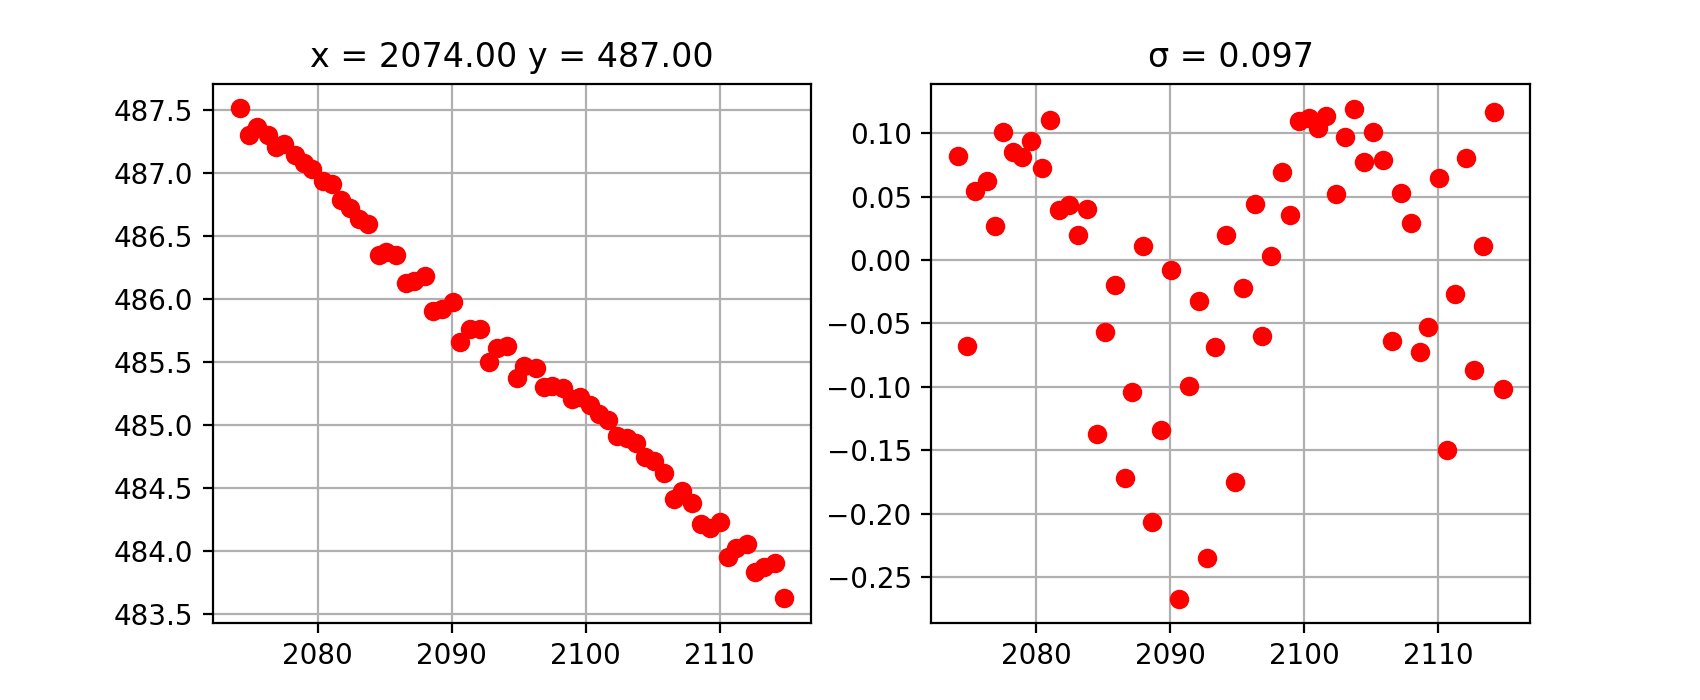

In [6]:
# star coordinates
x = 2074
y = 487
plot_residuals(x, y, table_list)

<IPython.core.display.Javascript object>


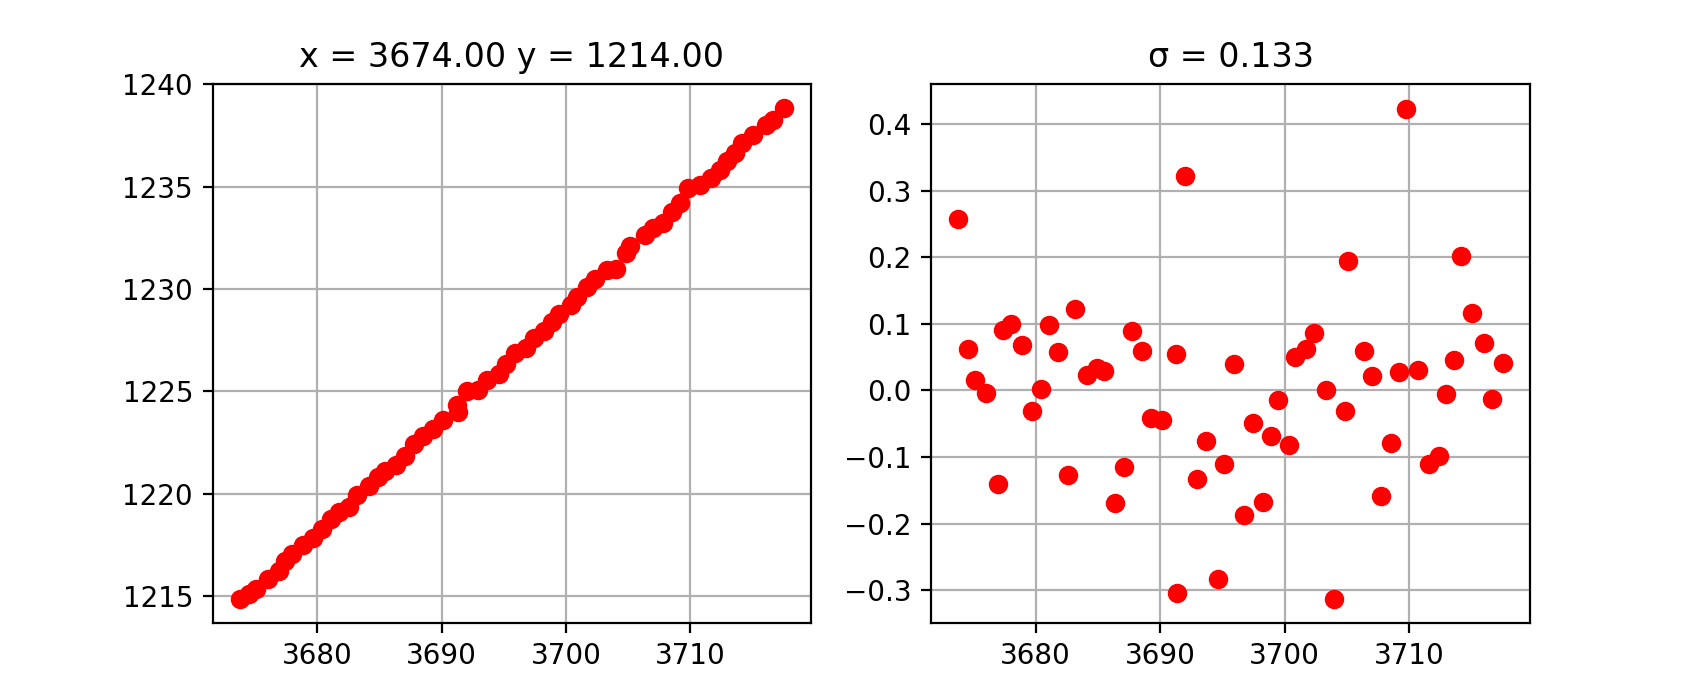

In [7]:
x0 = 3674
y0 = 1214
plot_residuals(x0, y0, table_list)

<IPython.core.display.Javascript object>


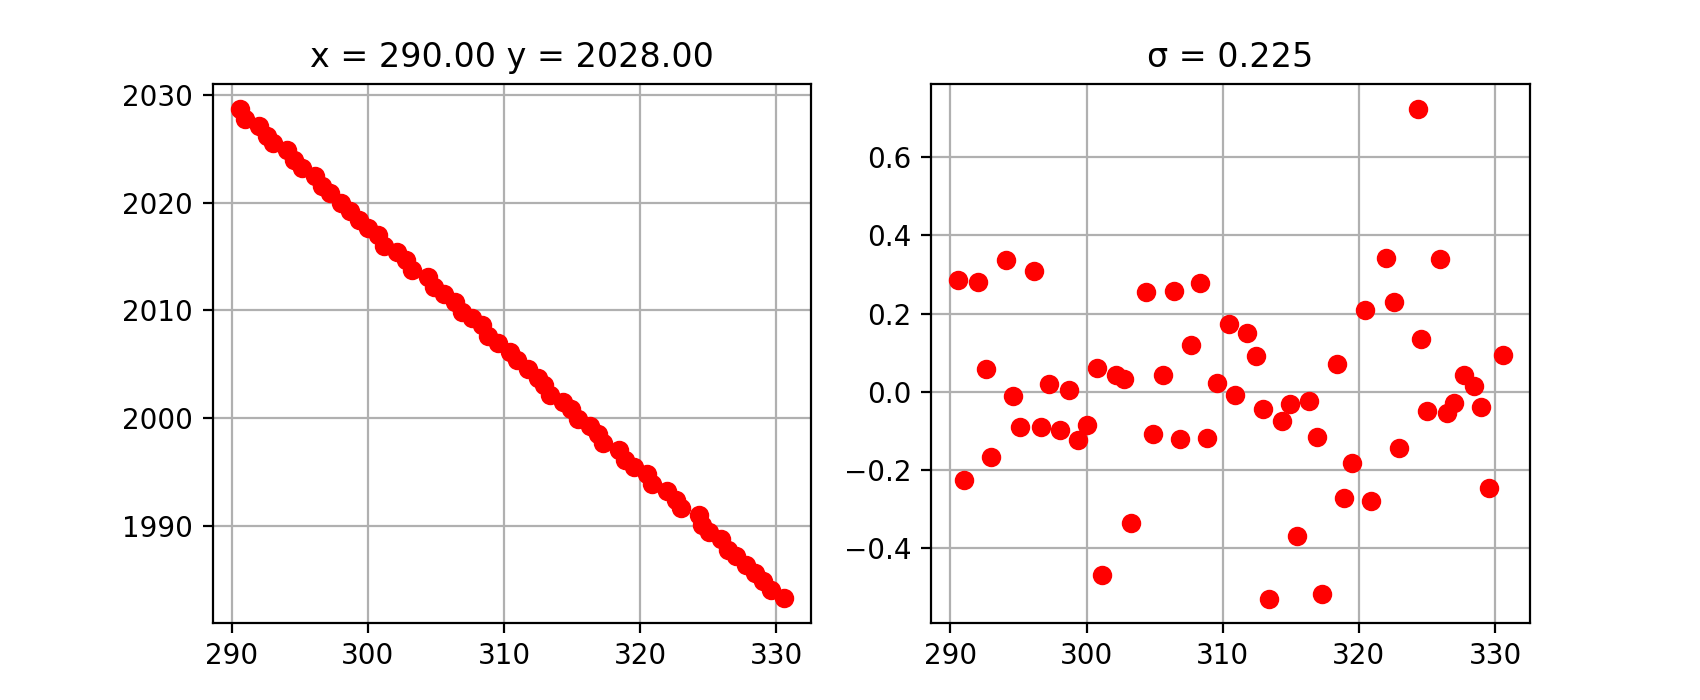

In [8]:
x0 = 290
y0 = 2028
plot_residuals(x0, y0, table_list)

<IPython.core.display.Javascript object>


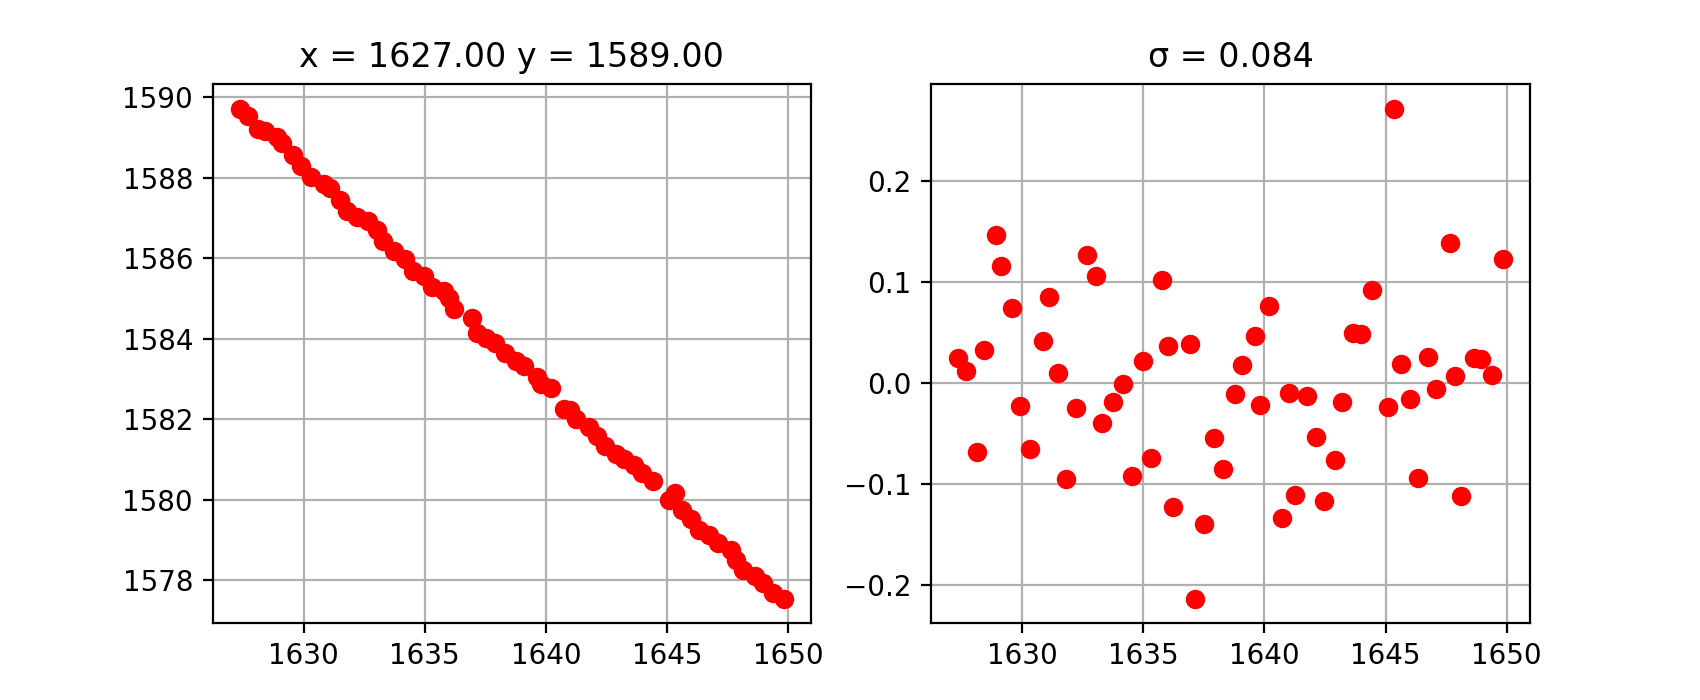

In [9]:
x0 = 1627
y0 = 1589
plot_residuals(x0, y0, table_list)

<IPython.core.display.Javascript object>


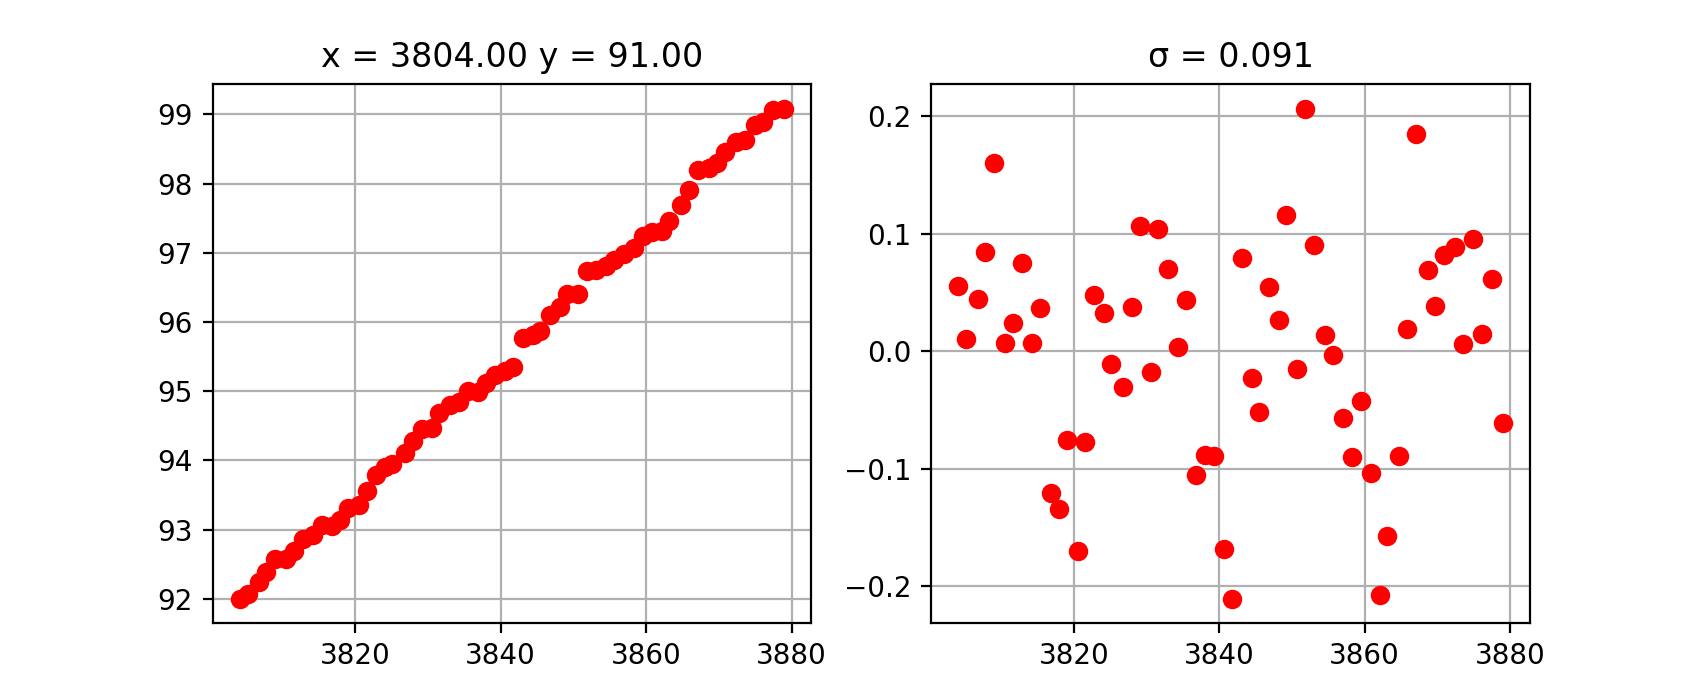

In [10]:
x0 = 3804
y0 = 91
plot_residuals(x0, y0, table_list)

<IPython.core.display.Javascript object>


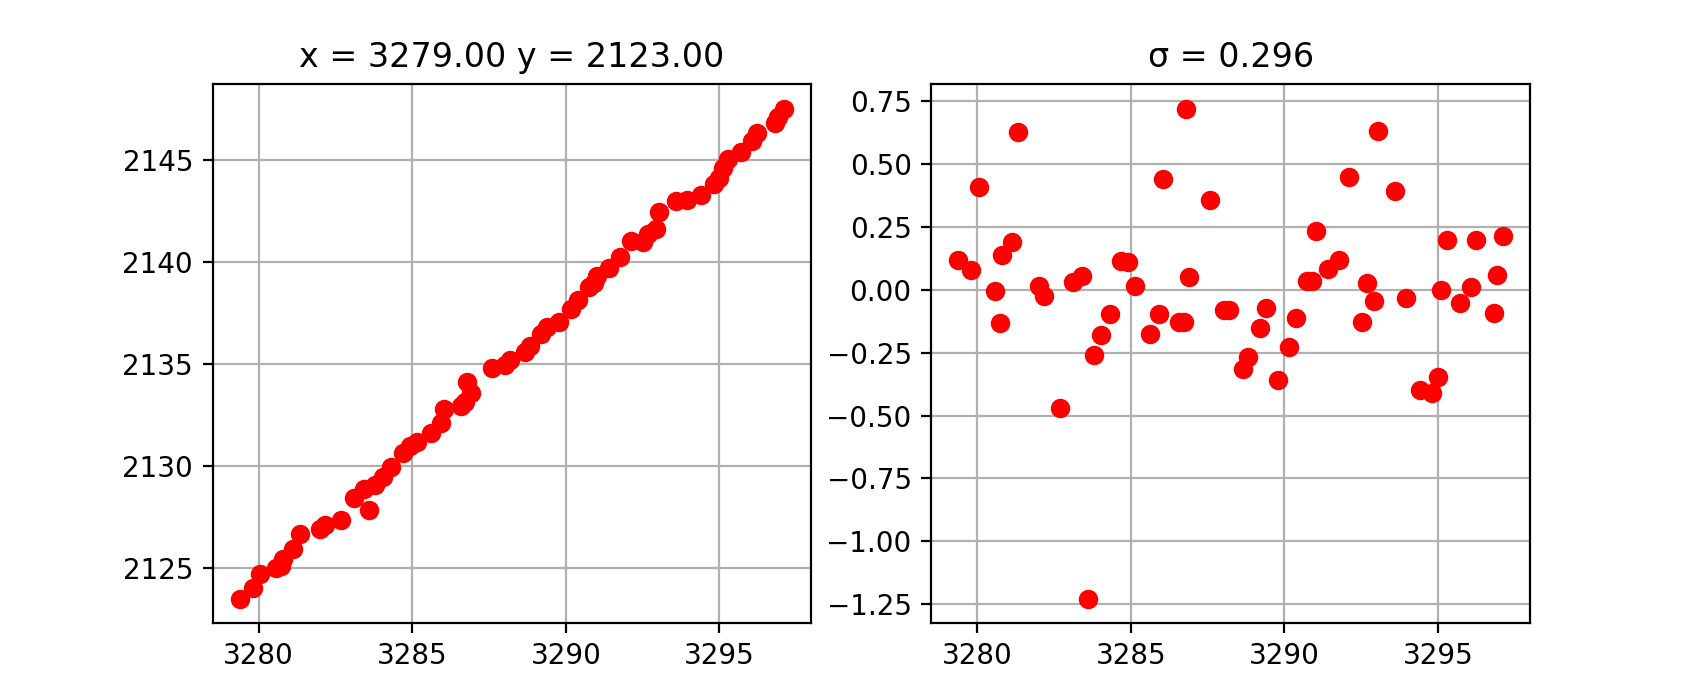

In [11]:
x0 = 3279
y0 = 2123
plot_residuals(x0, y0, table_list)

<IPython.core.display.Javascript object>


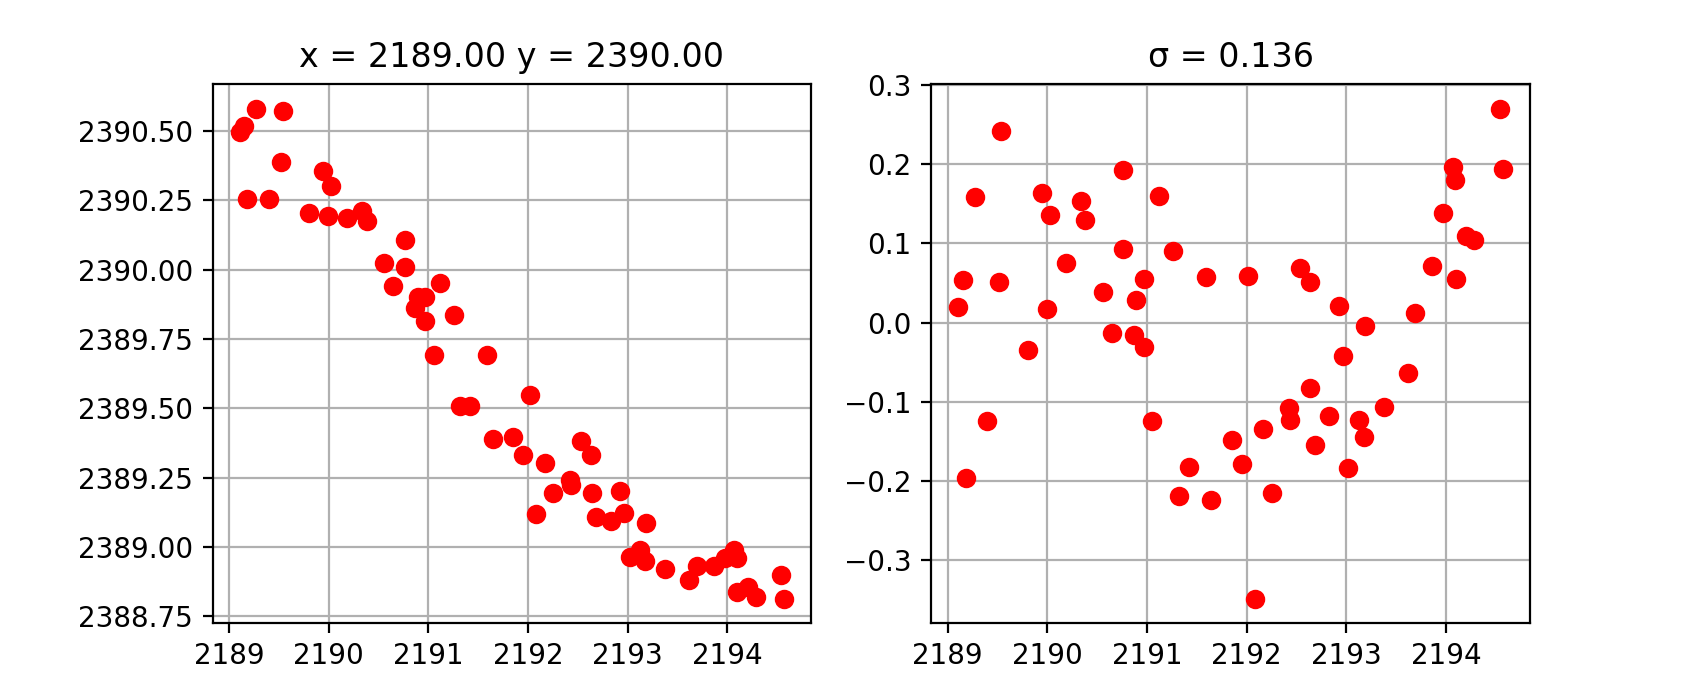

In [12]:
x0 = 2189
y0 = 2390
plot_residuals(x0, y0, table_list)

<IPython.core.display.Javascript object>


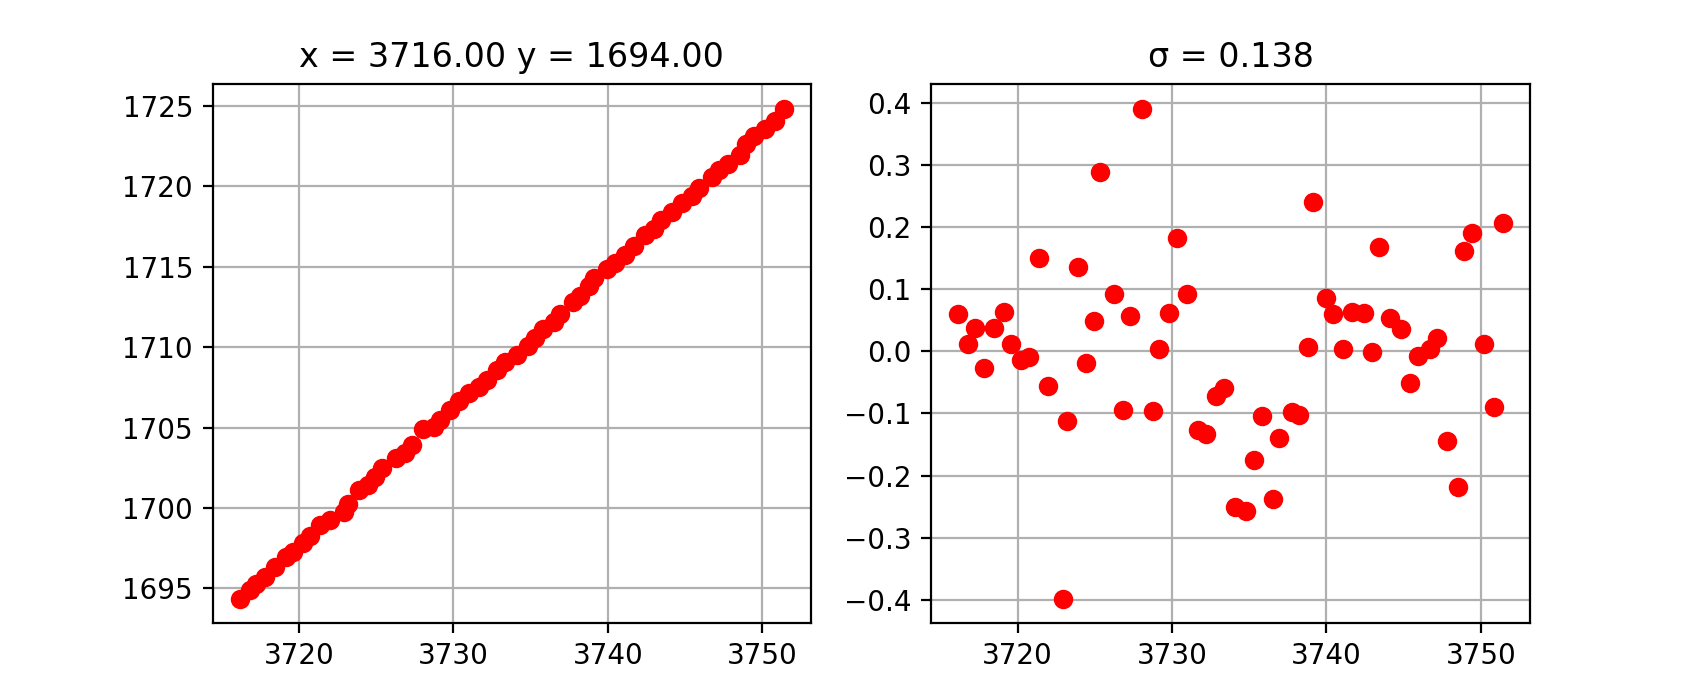

In [13]:
x0 = 3716
y0 = 1694
plot_residuals(x0, y0, table_list)

Cannot find star at  700 700 . Picking nearest.


<IPython.core.display.Javascript object>


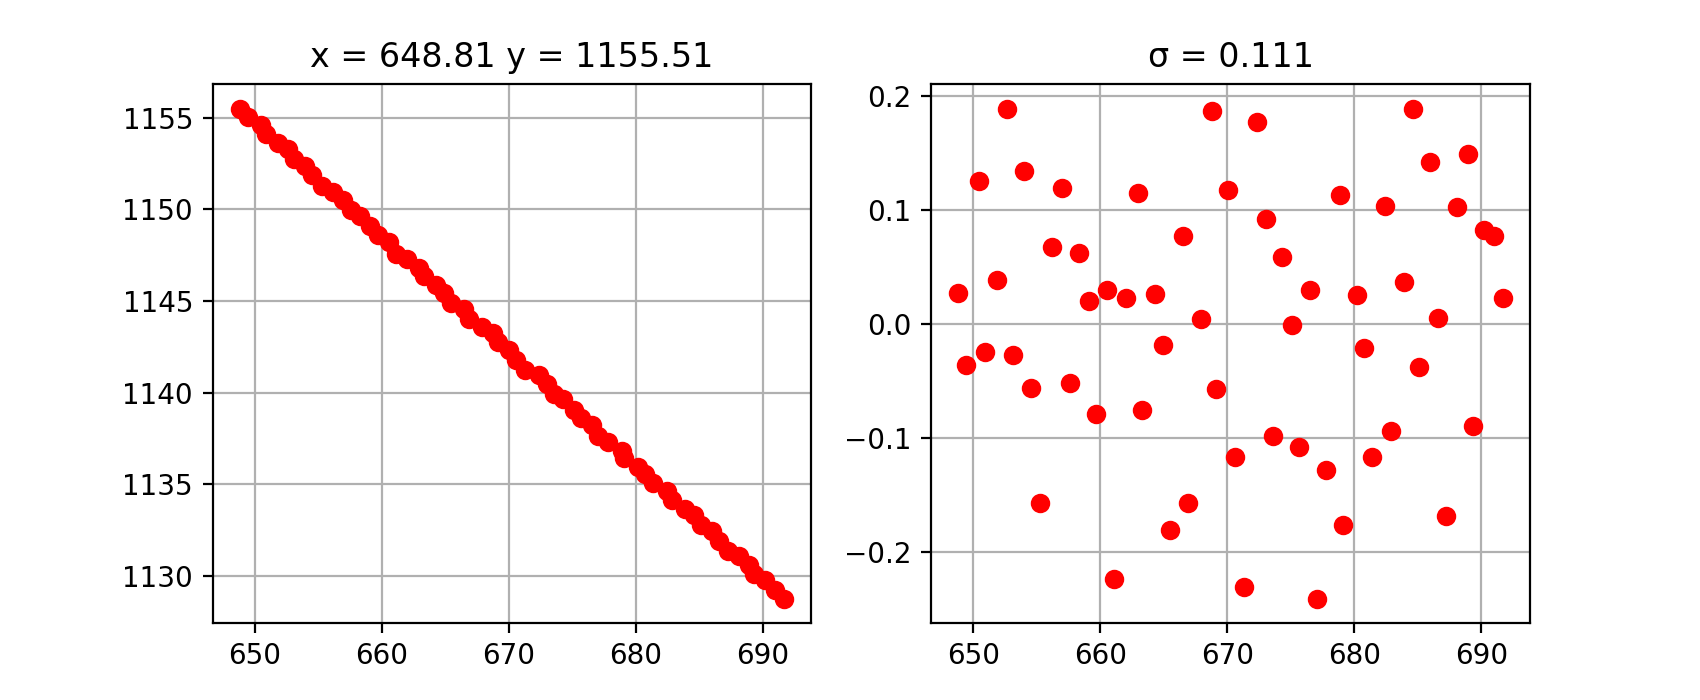

Cannot find star at  700 1400 . Picking nearest.


<IPython.core.display.Javascript object>


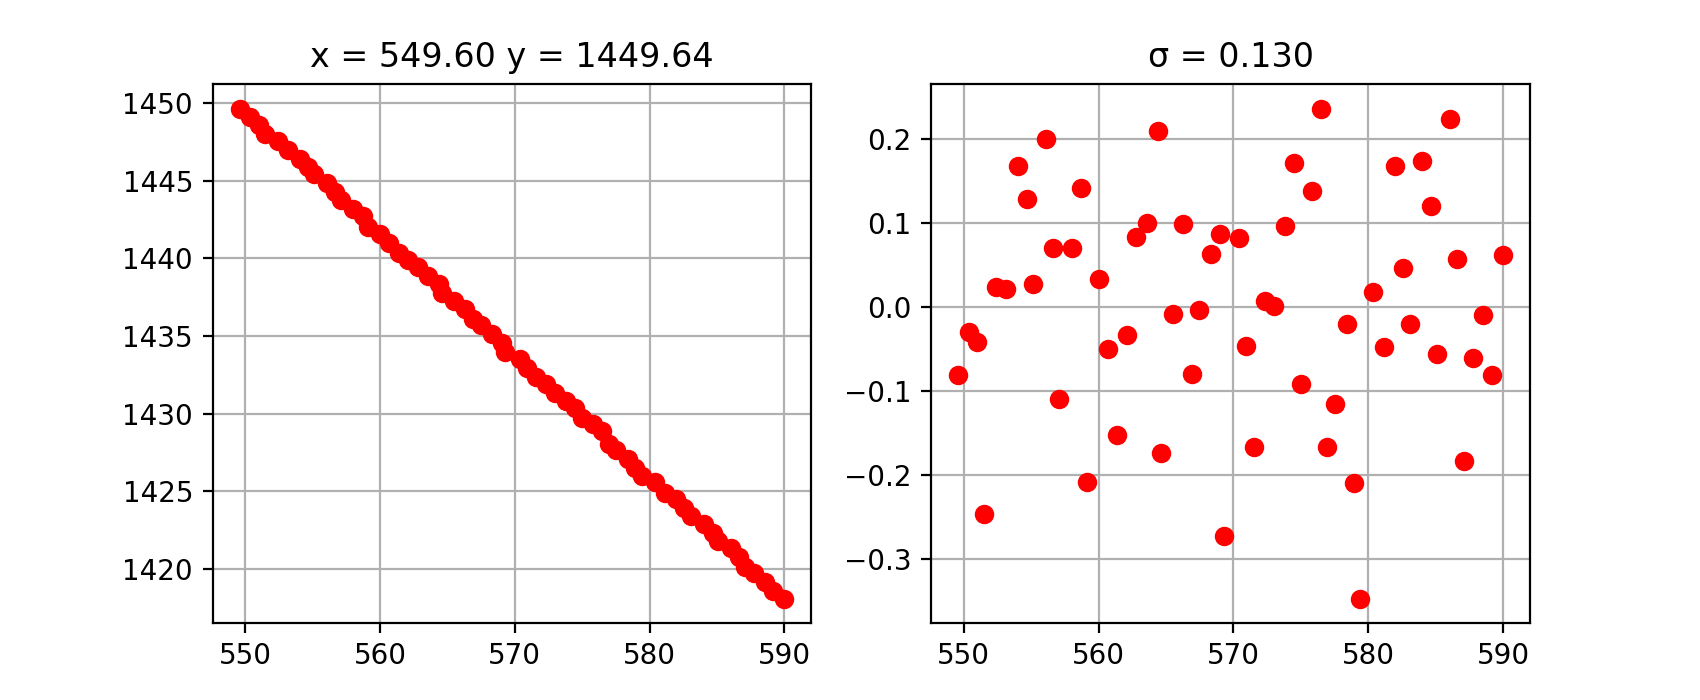

Cannot find star at  700 2100 . Picking nearest.


<IPython.core.display.Javascript object>


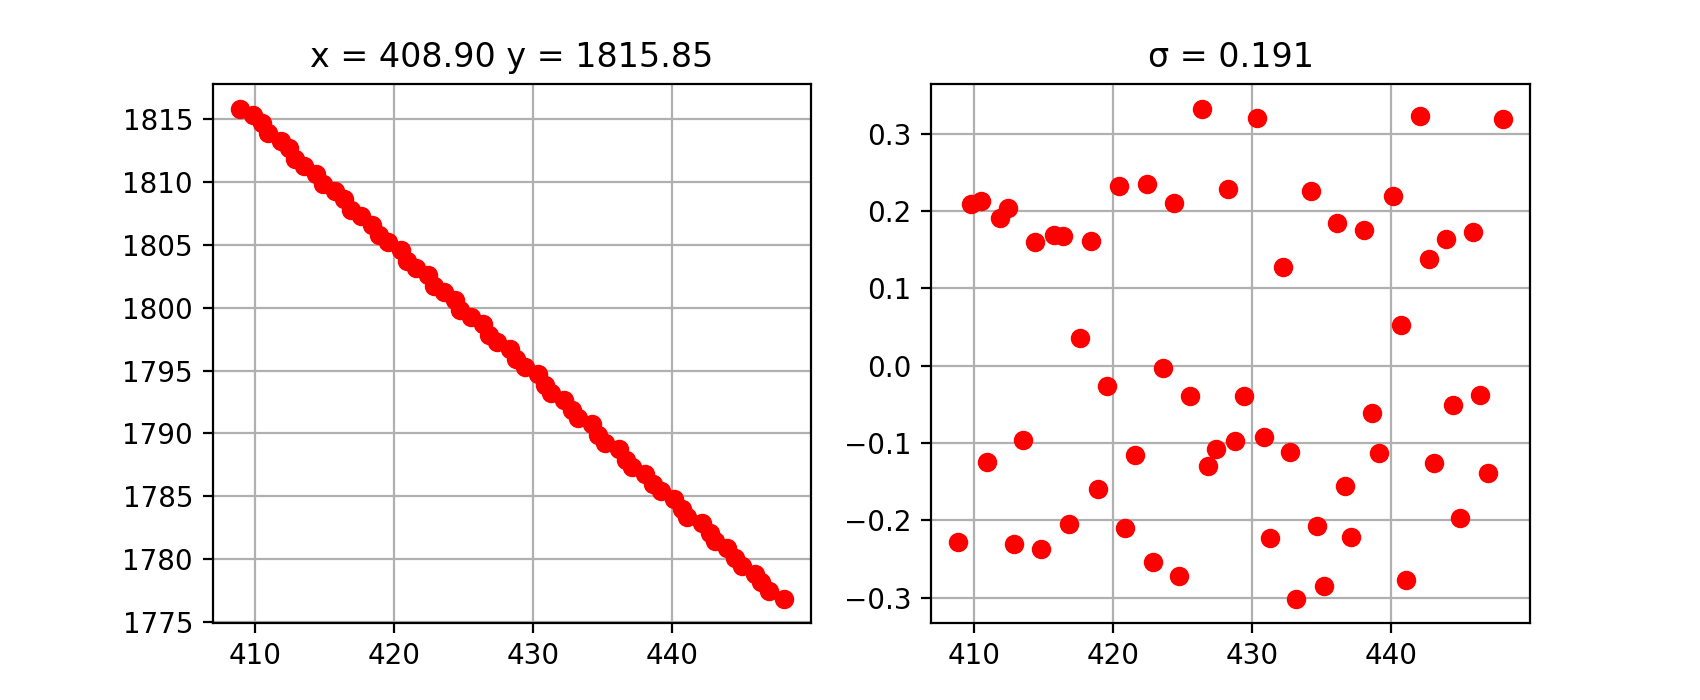

Cannot find star at  700 2800 . Picking nearest.


<IPython.core.display.Javascript object>


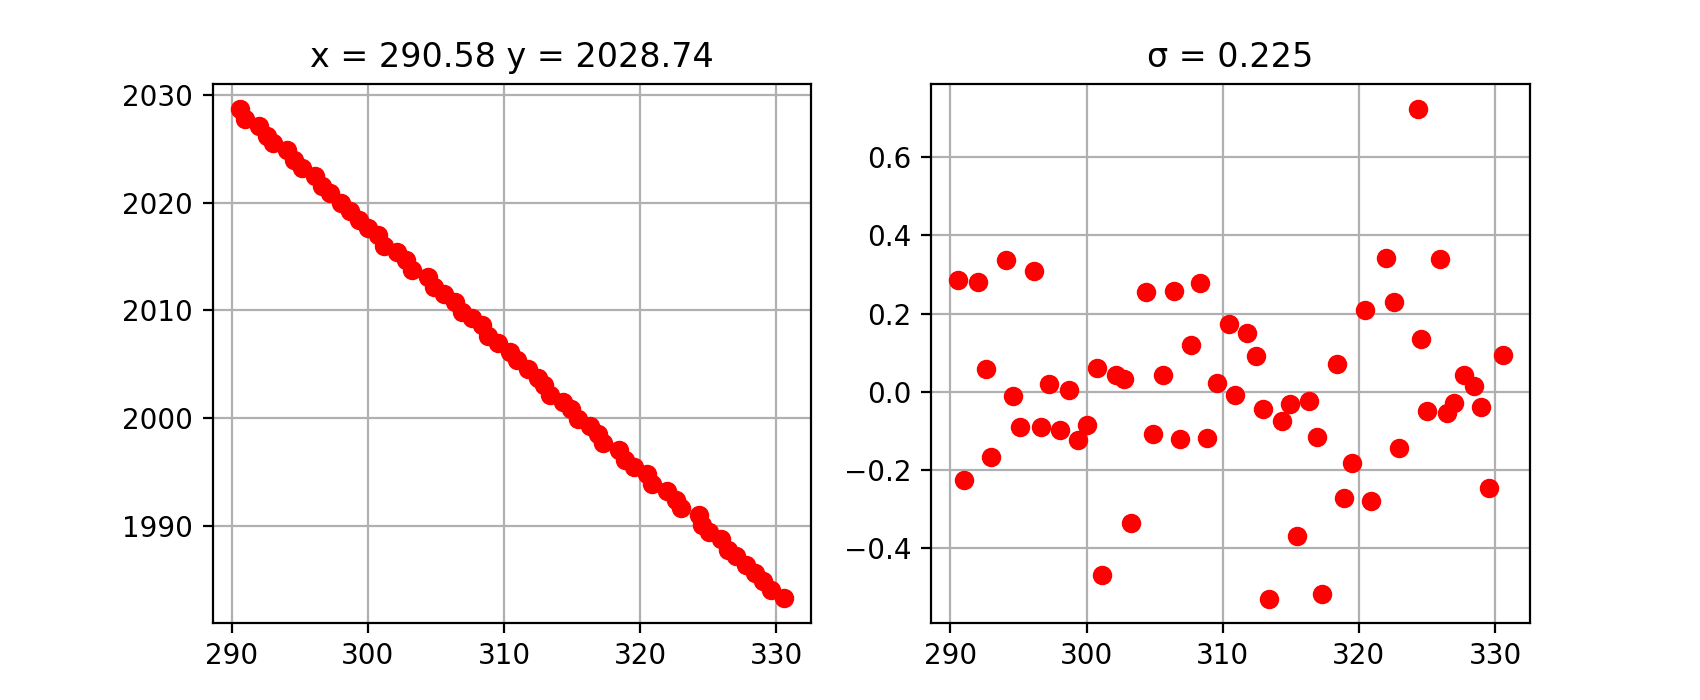

Cannot find star at  1400 700 . Picking nearest.


<IPython.core.display.Javascript object>


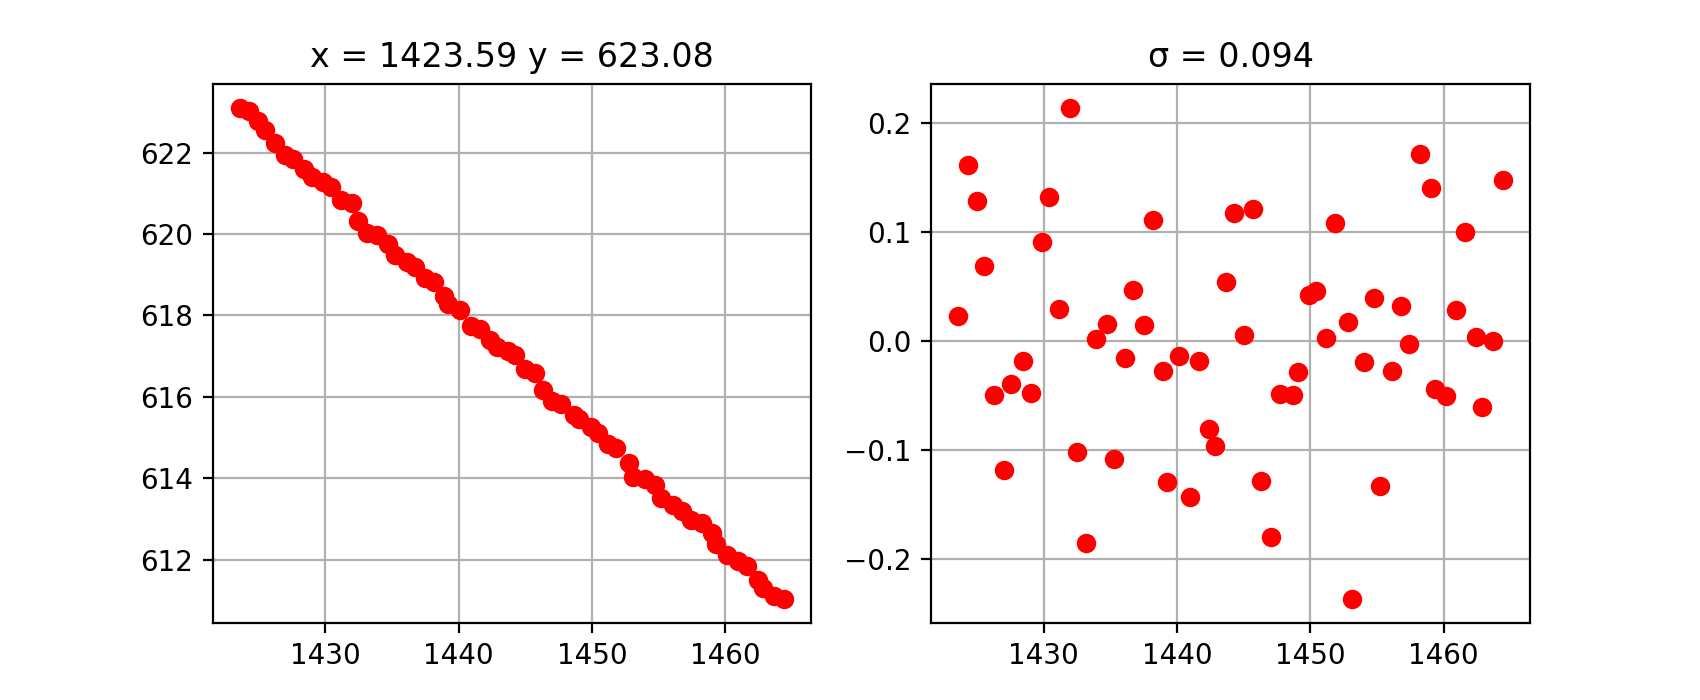

Cannot find star at  1400 1400 . Picking nearest.


<IPython.core.display.Javascript object>


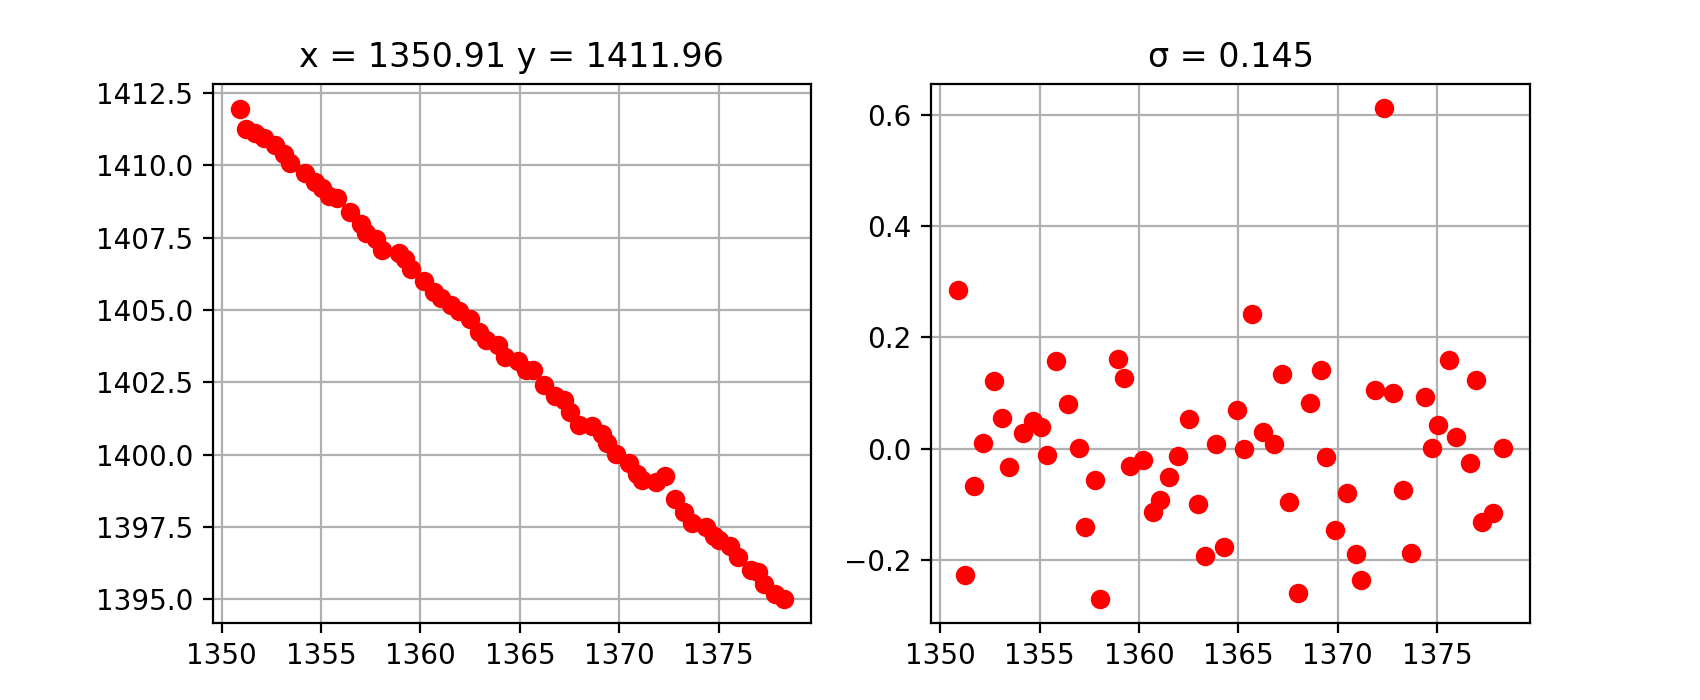

Cannot find star at  1400 2100 . Picking nearest.


<IPython.core.display.Javascript object>


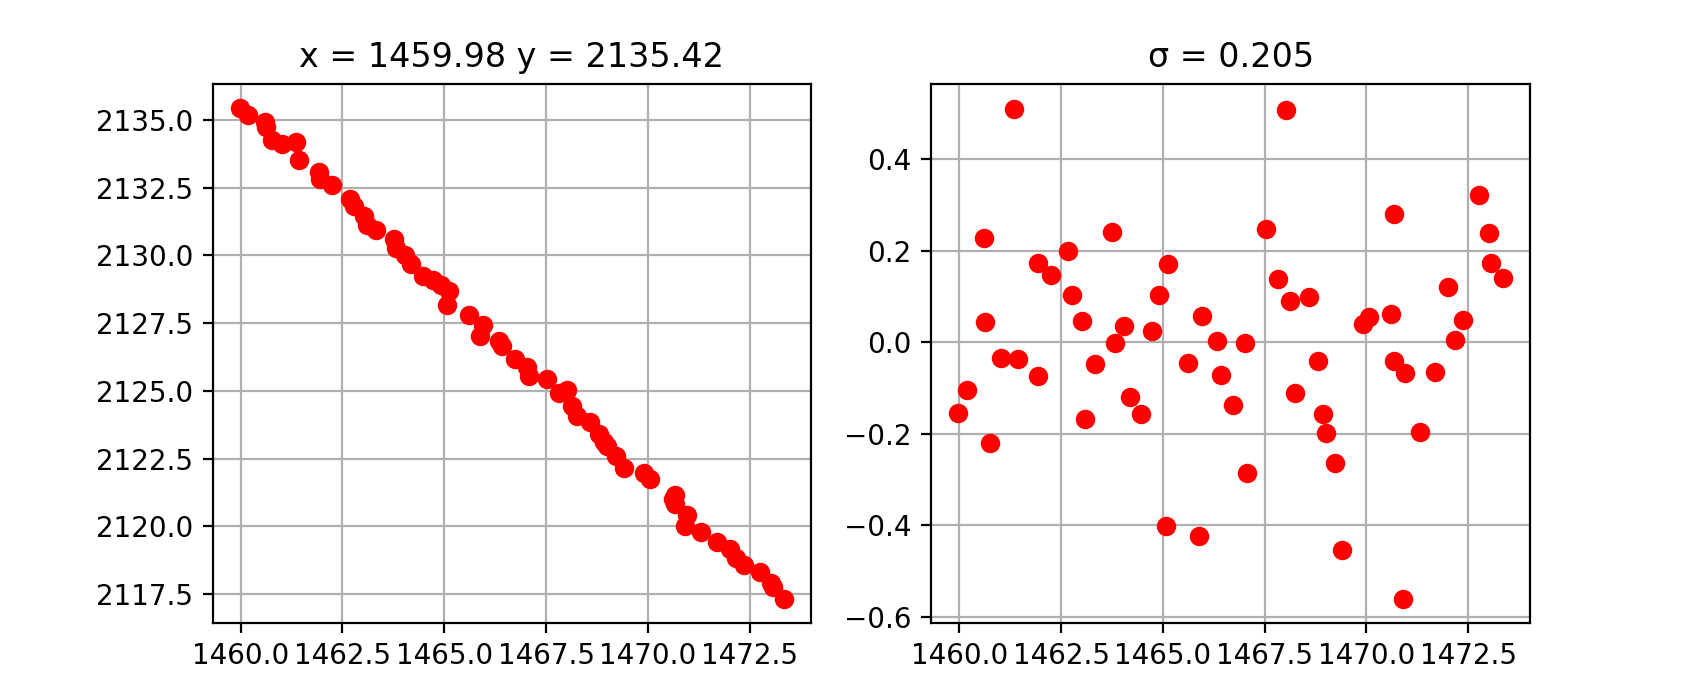

Cannot find star at  1400 2800 . Picking nearest.


<IPython.core.display.Javascript object>


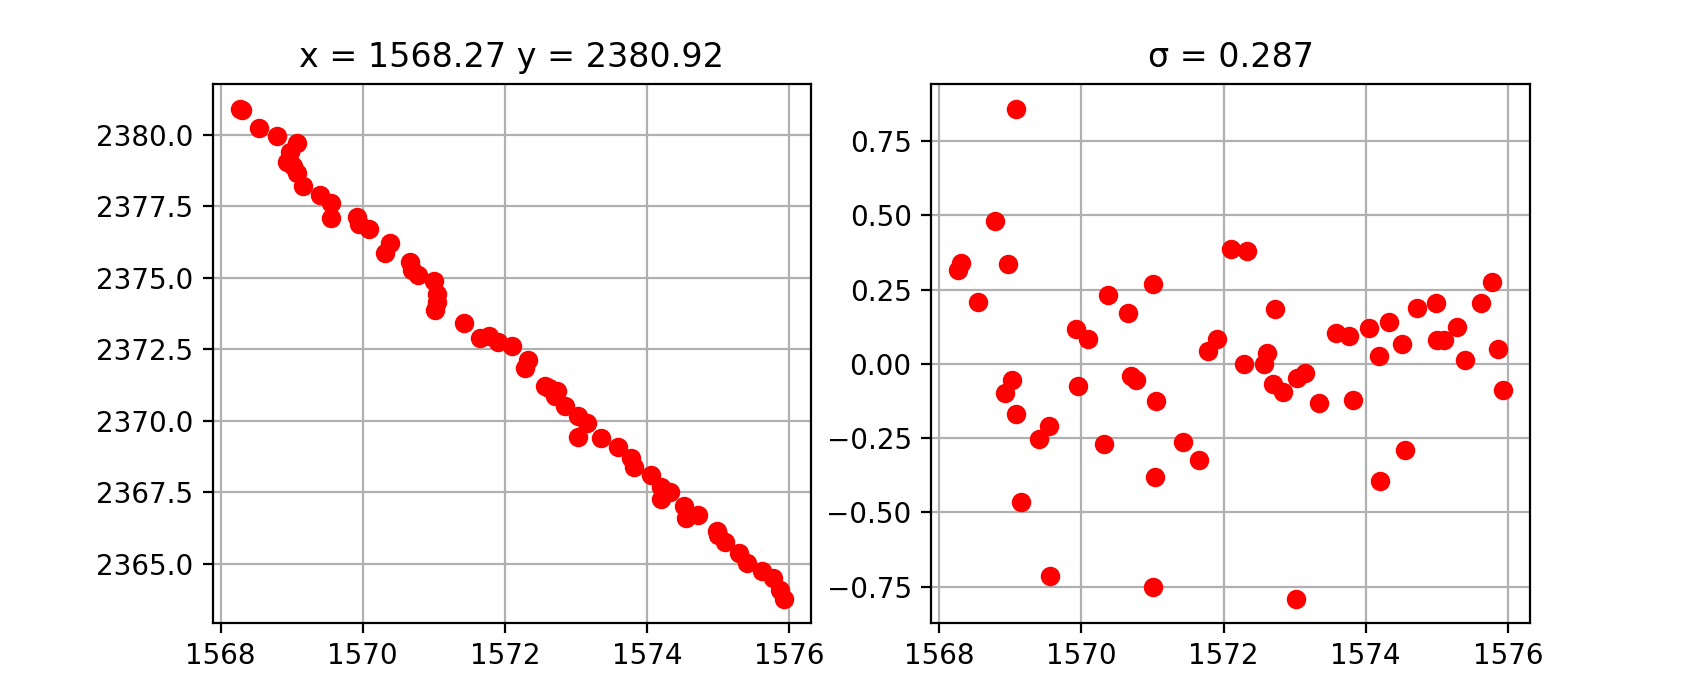

Cannot find star at  2100 700 . Picking nearest.


<IPython.core.display.Javascript object>


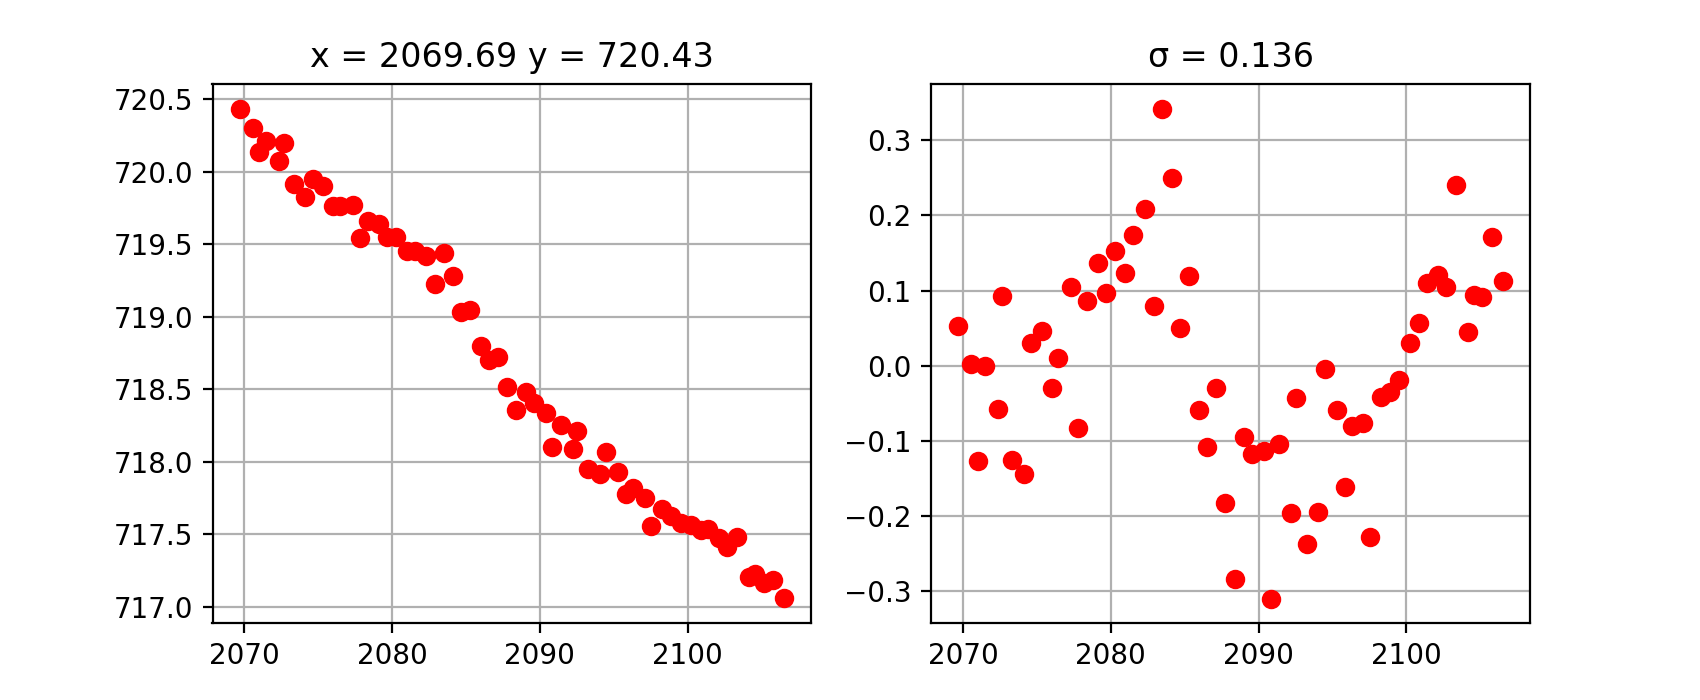

Cannot find star at  2100 1400 . Picking nearest.


<IPython.core.display.Javascript object>


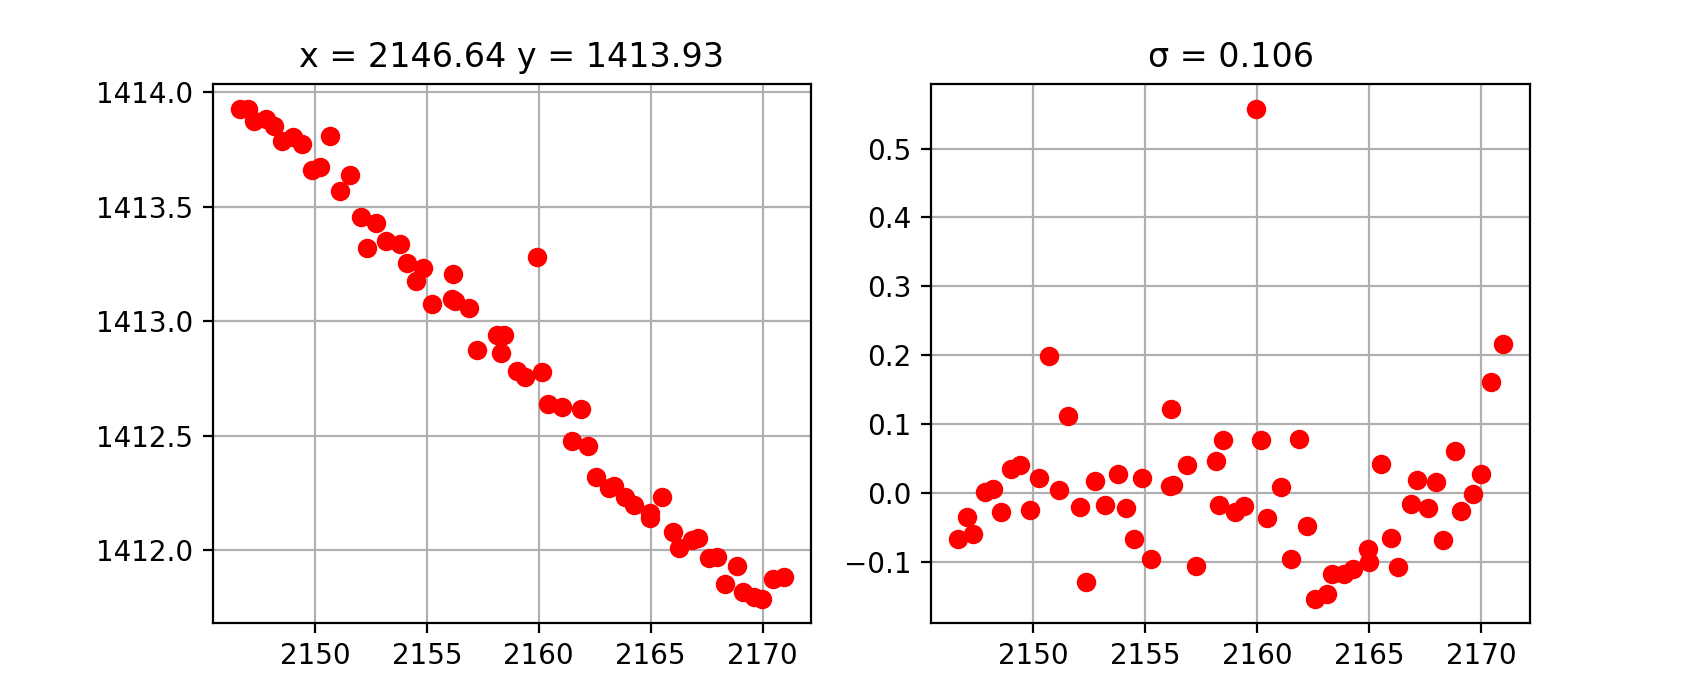

Cannot find star at  2100 2100 . Picking nearest.


<IPython.core.display.Javascript object>


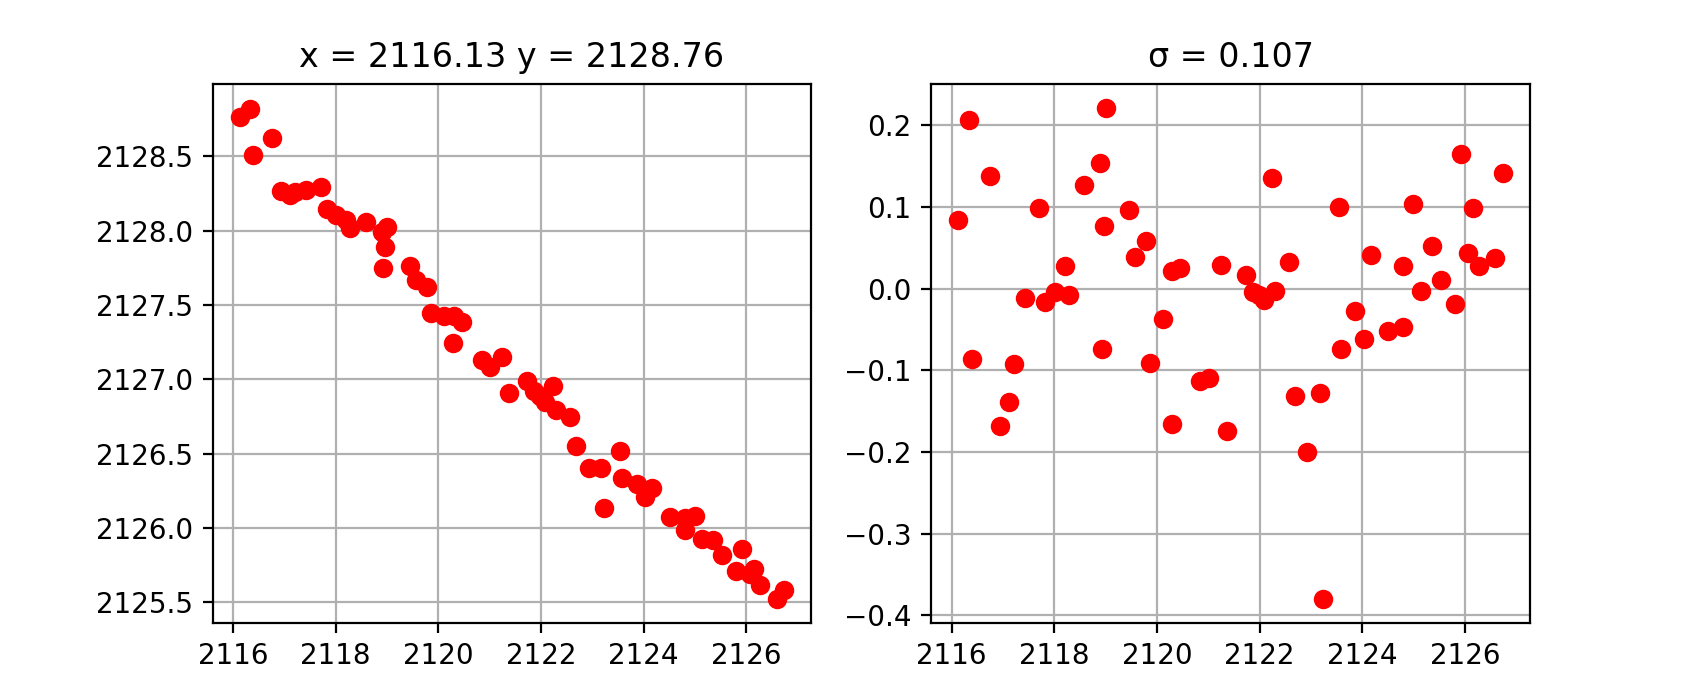

Cannot find star at  2100 2800 . Picking nearest.


<IPython.core.display.Javascript object>


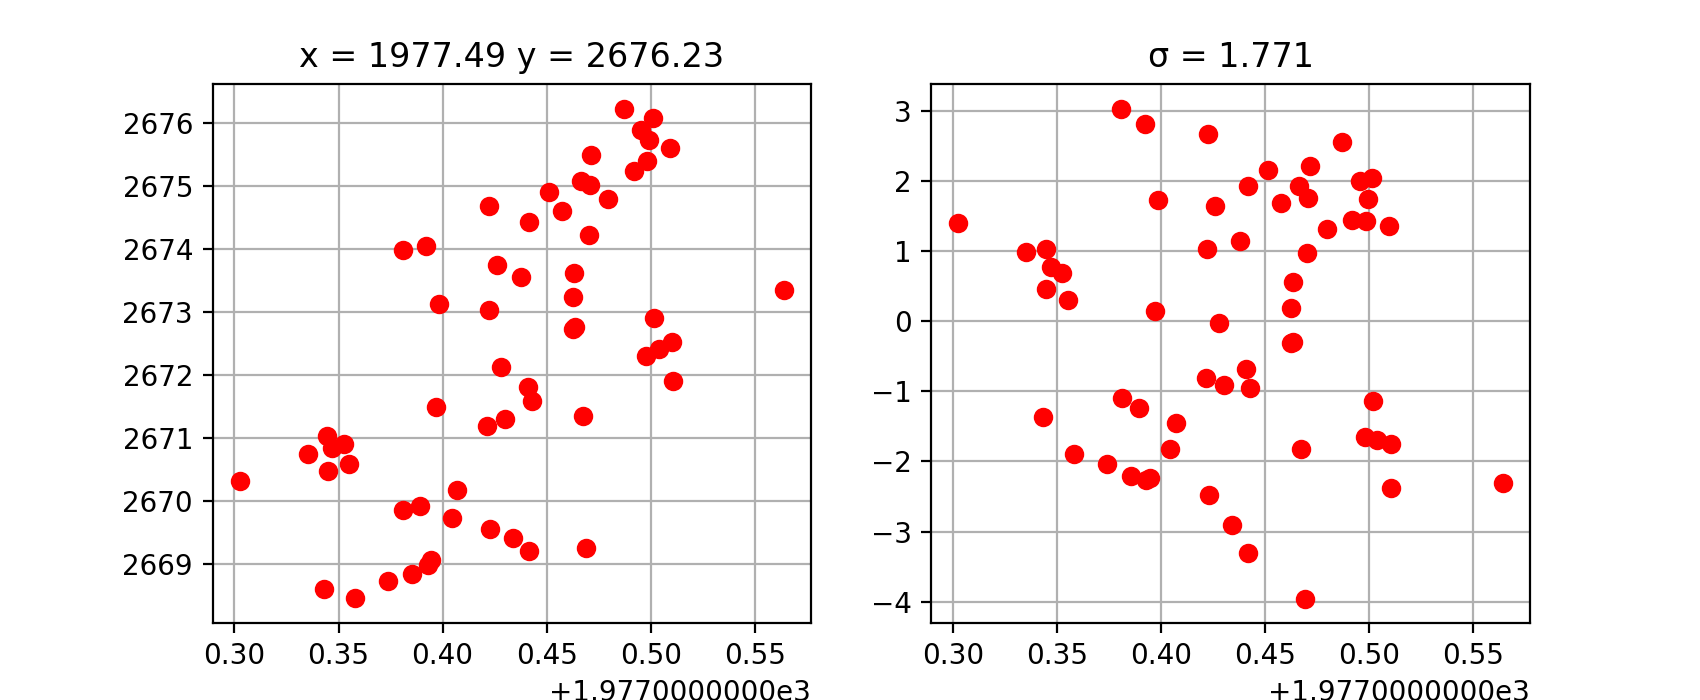

Cannot find star at  2800 700 . Picking nearest.


/Users/busko/Projects/software/miniconda3_2/envs/raw/lib/python3.7/site-packages/ipykernel_launcher.py:58: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


<IPython.core.display.Javascript object>


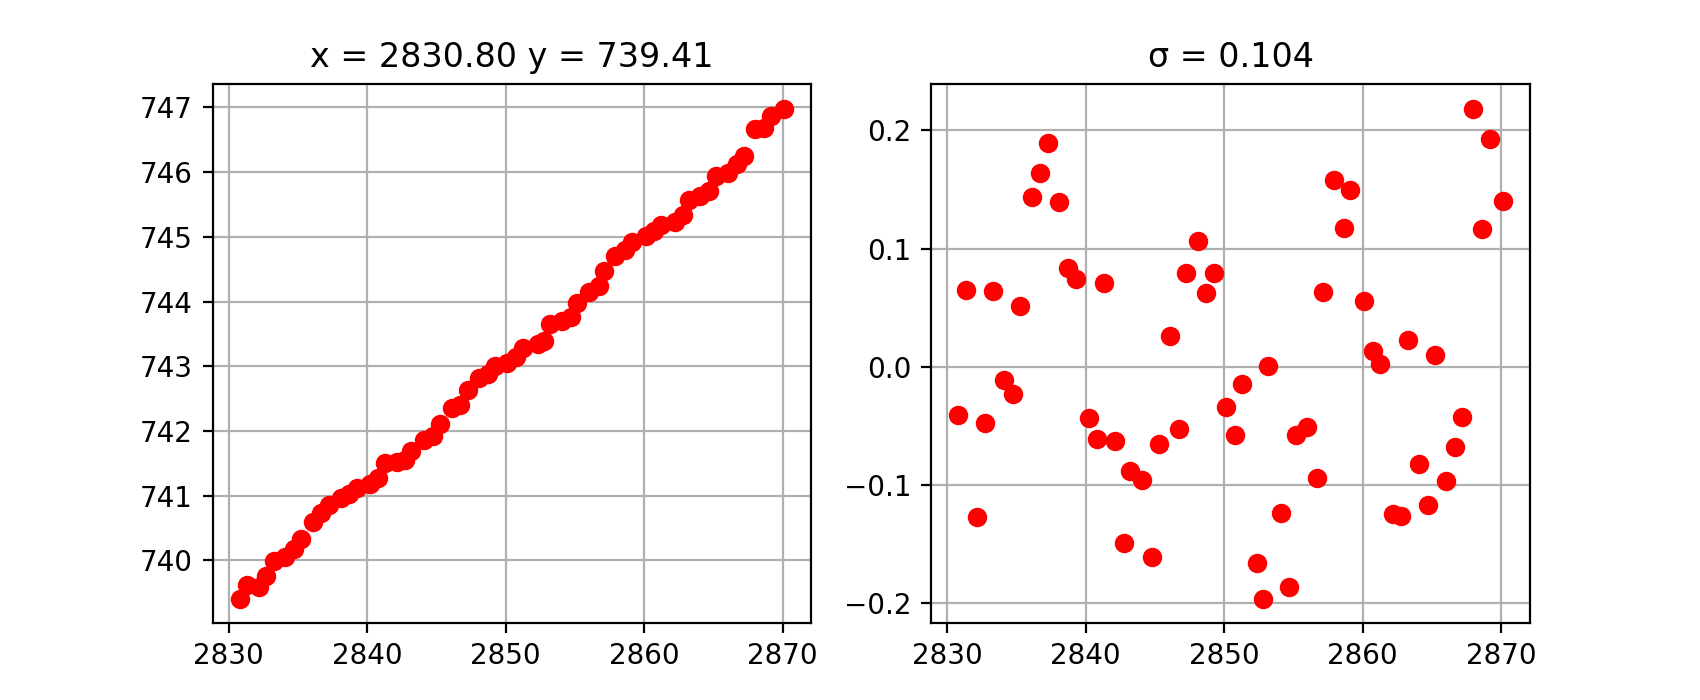

Cannot find star at  2800 1400 . Picking nearest.


<IPython.core.display.Javascript object>


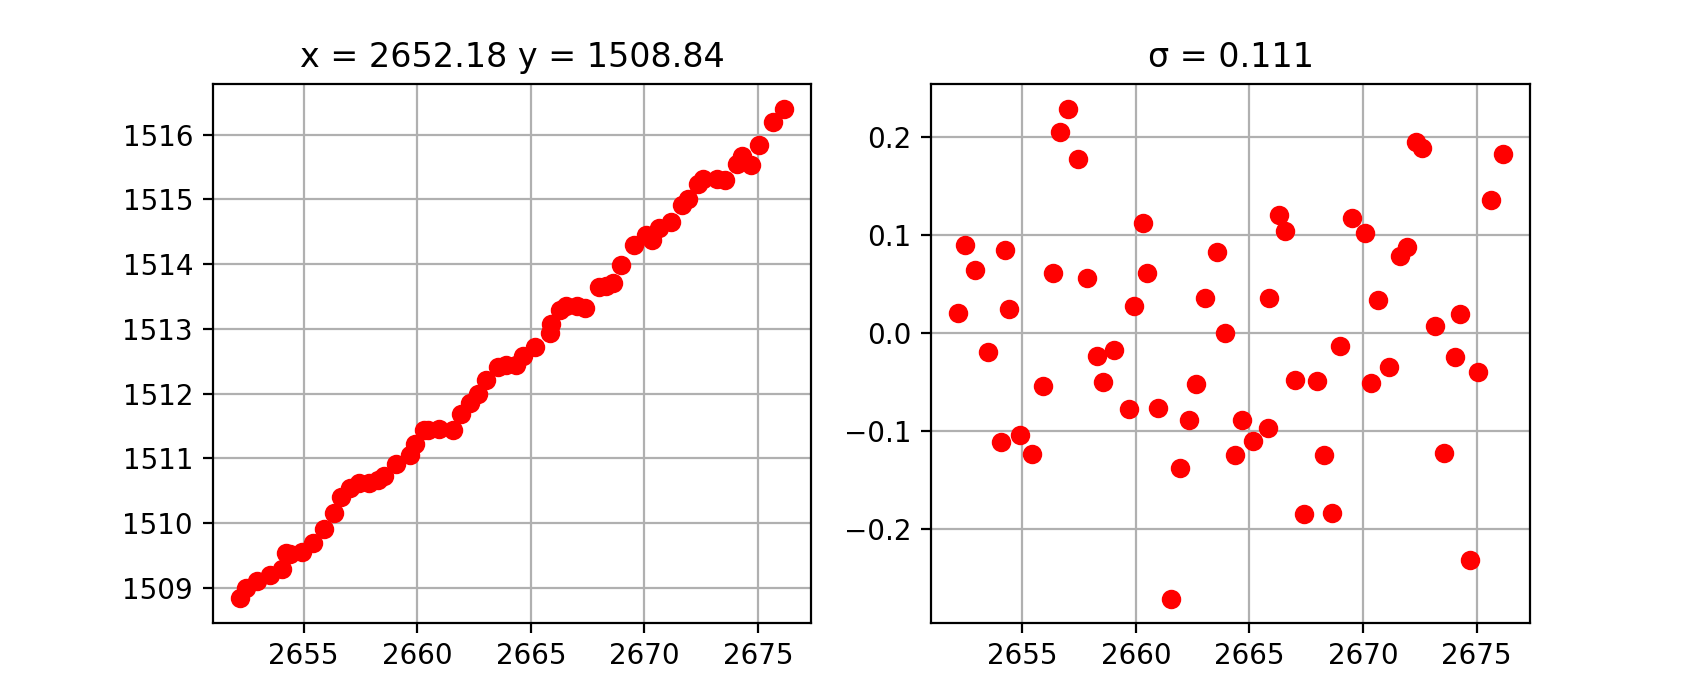

Cannot find star at  2800 2100 . Picking nearest.


<IPython.core.display.Javascript object>


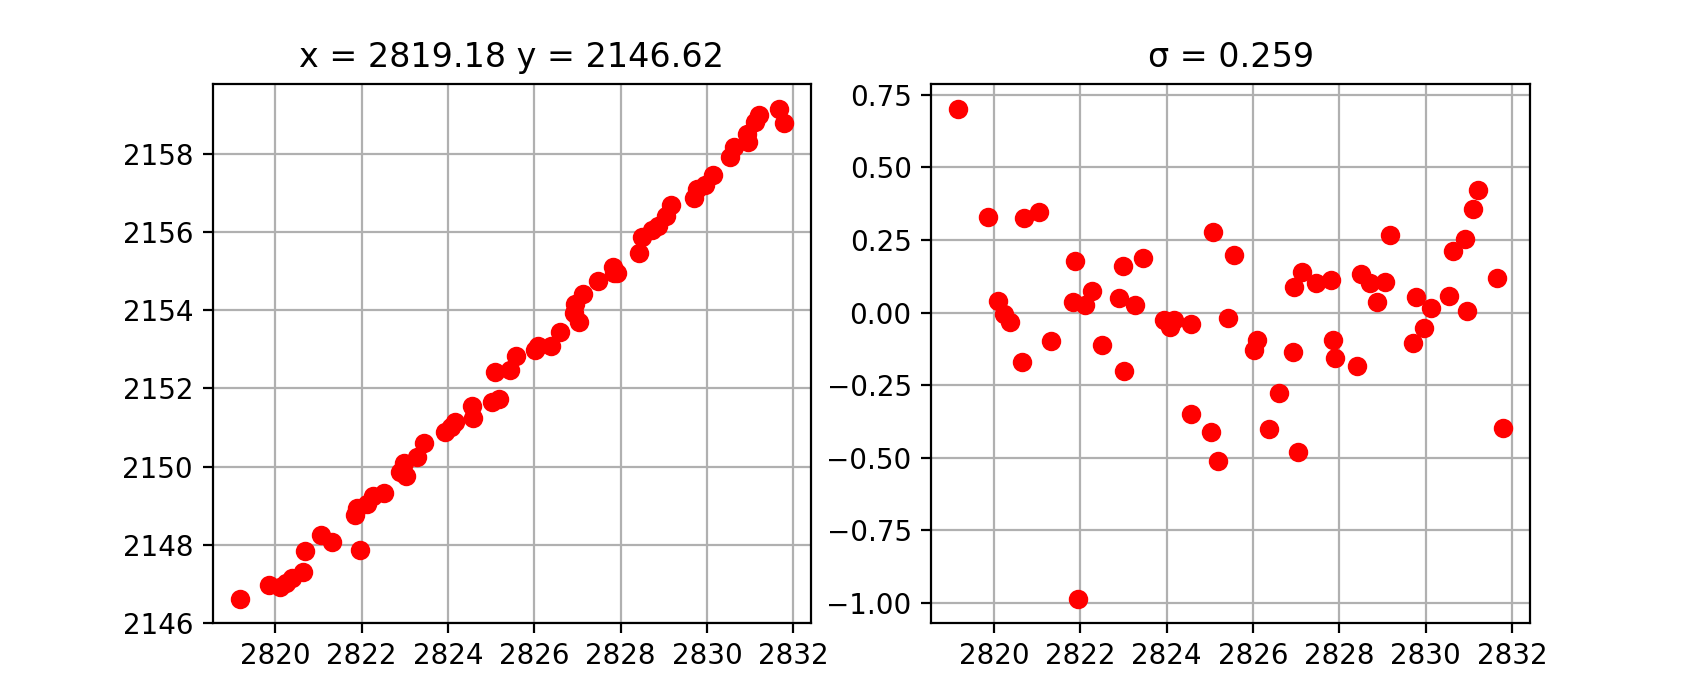

Cannot find star at  2800 2800 . Picking nearest.


<IPython.core.display.Javascript object>


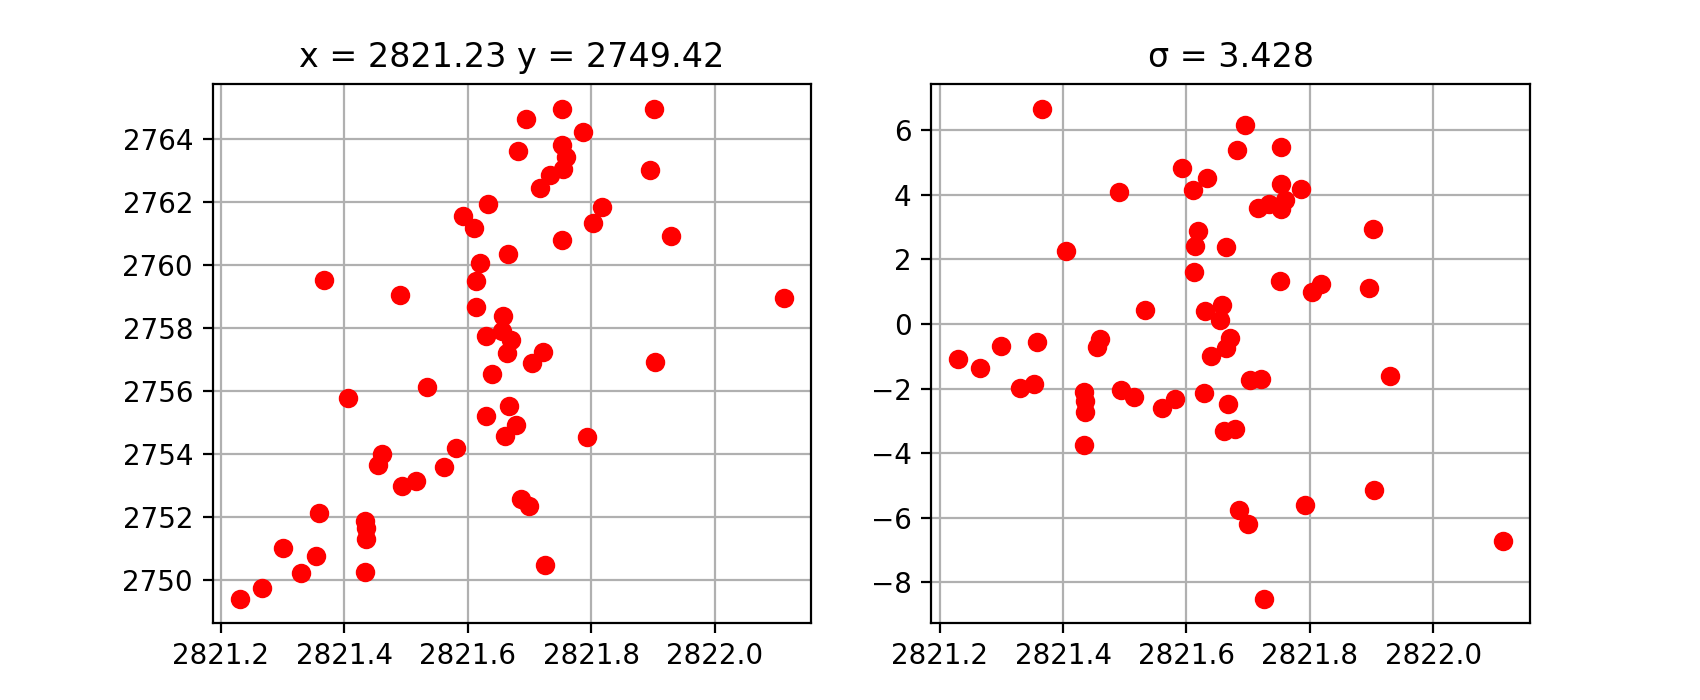

Cannot find star at  3500 700 . Picking nearest.


<IPython.core.display.Javascript object>


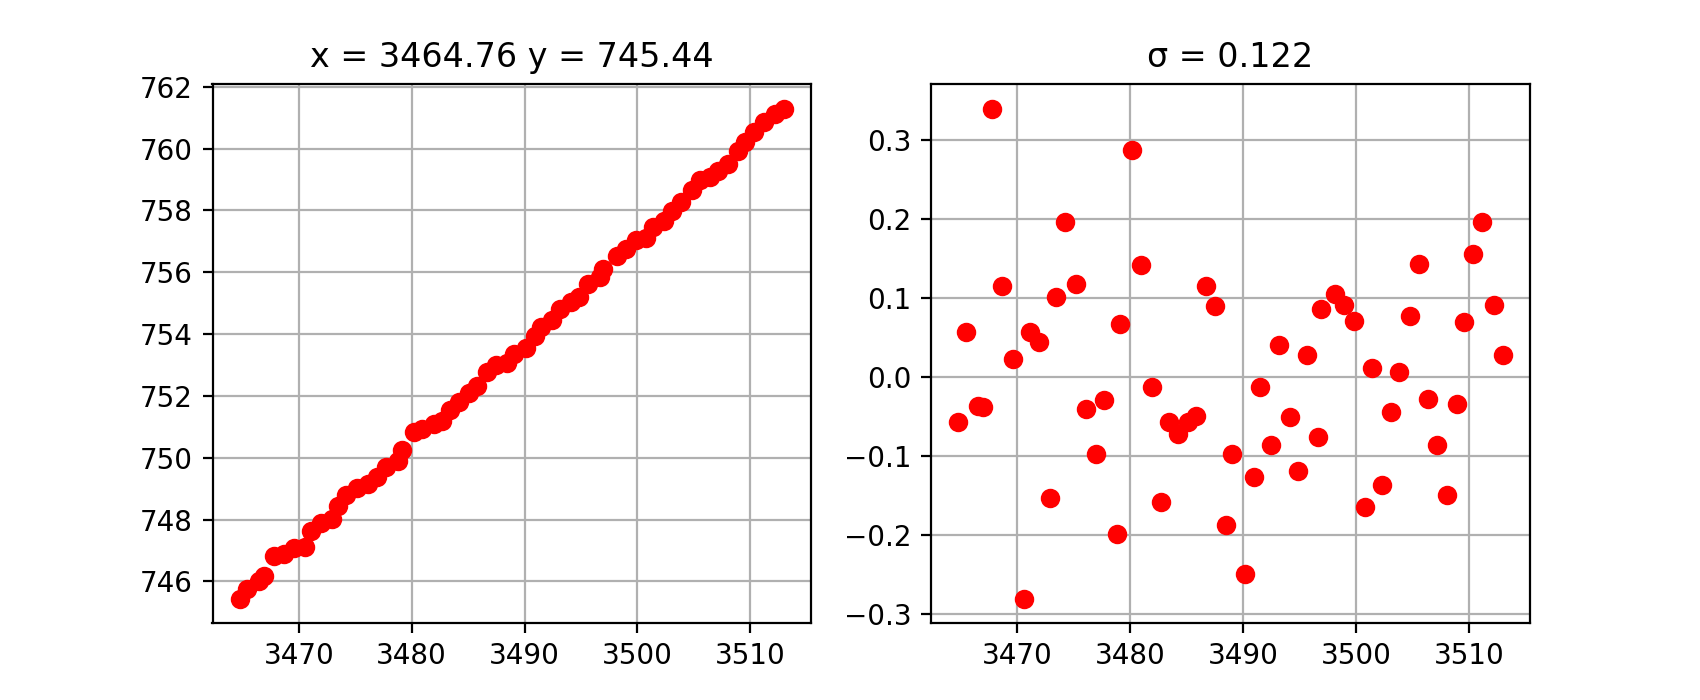

Cannot find star at  3500 1400 . Picking nearest.


<IPython.core.display.Javascript object>


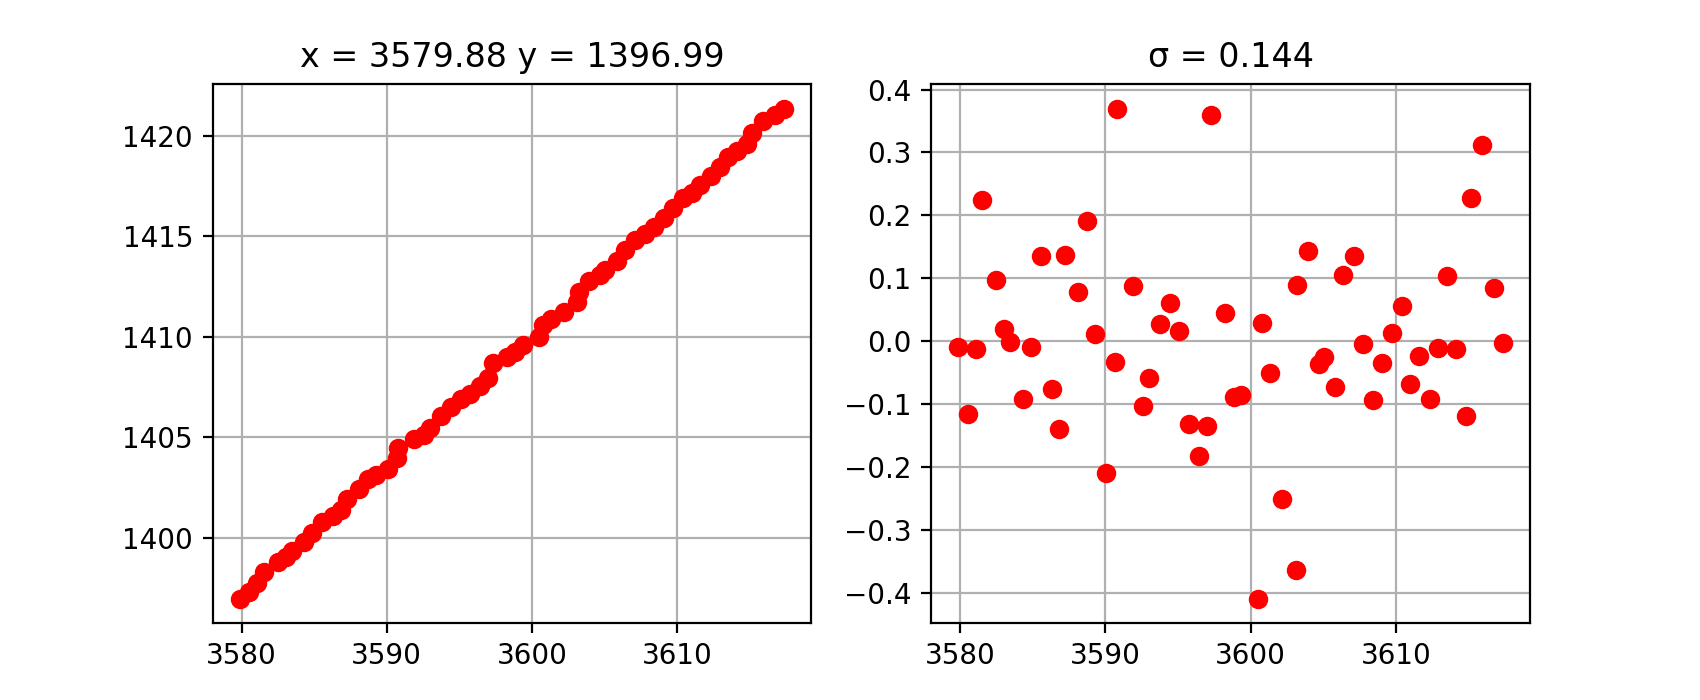

Cannot find star at  3500 2100 . Picking nearest.


<IPython.core.display.Javascript object>


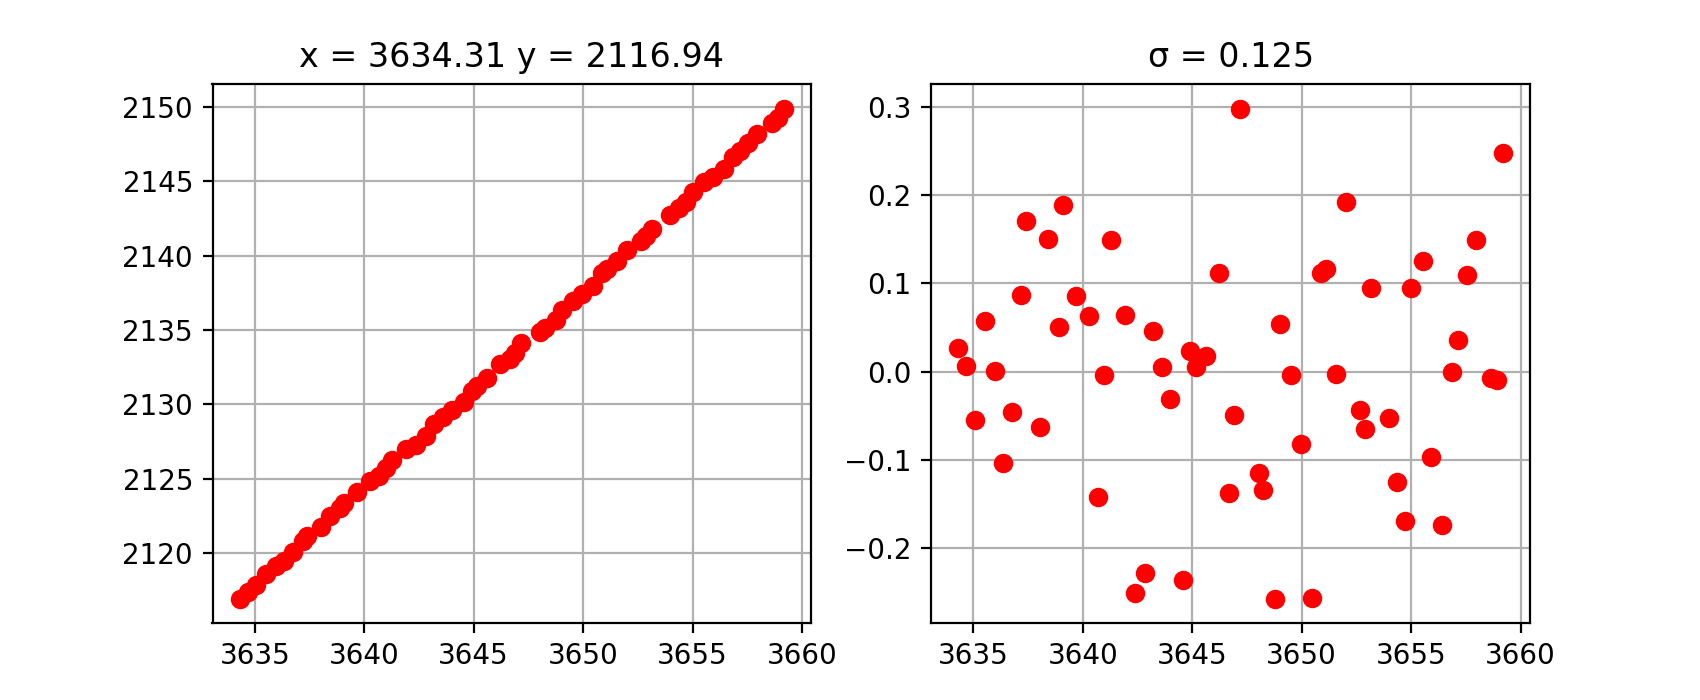

Cannot find star at  3500 2800 . Picking nearest.


<IPython.core.display.Javascript object>


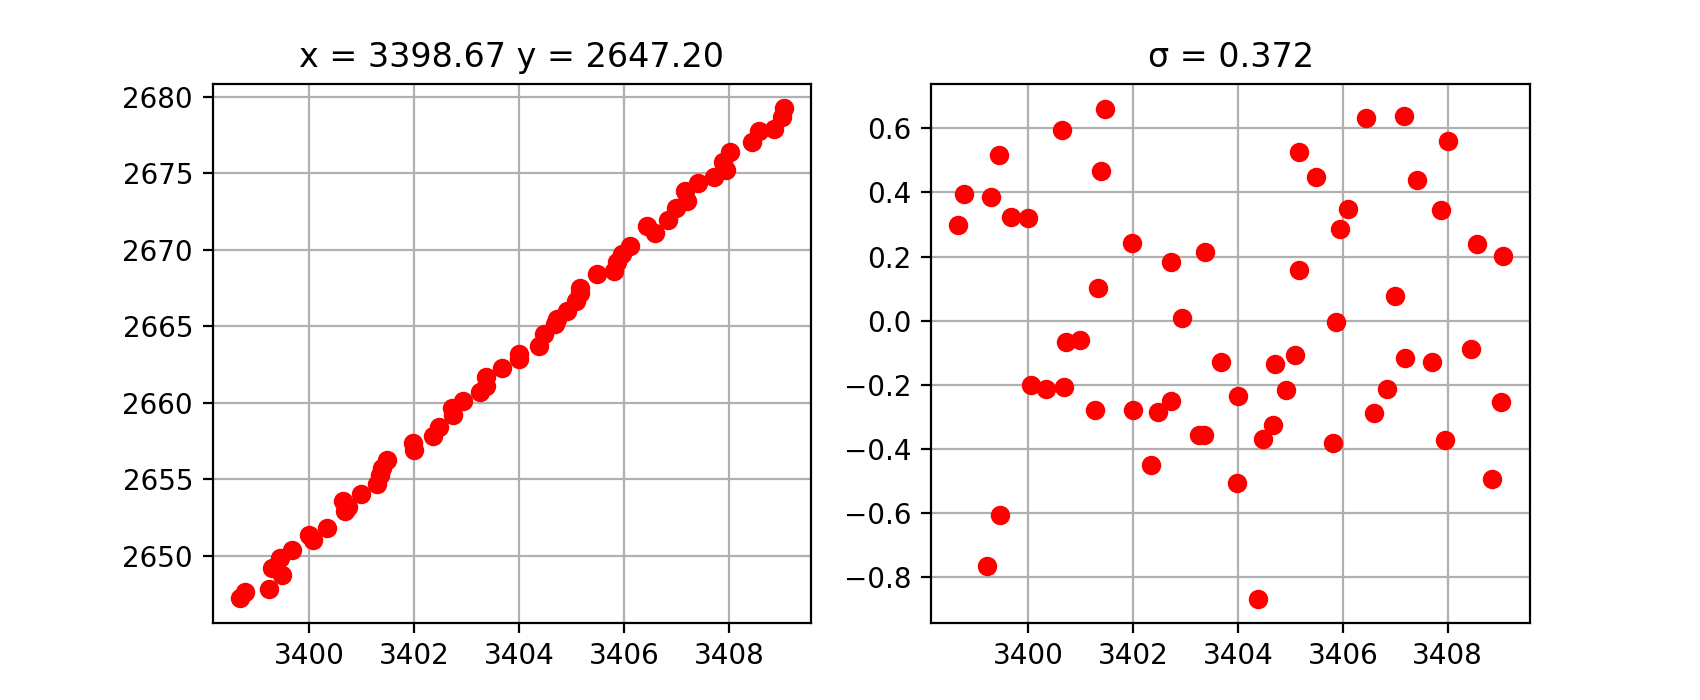

Cannot find star at  4200 700 . Picking nearest.


<IPython.core.display.Javascript object>


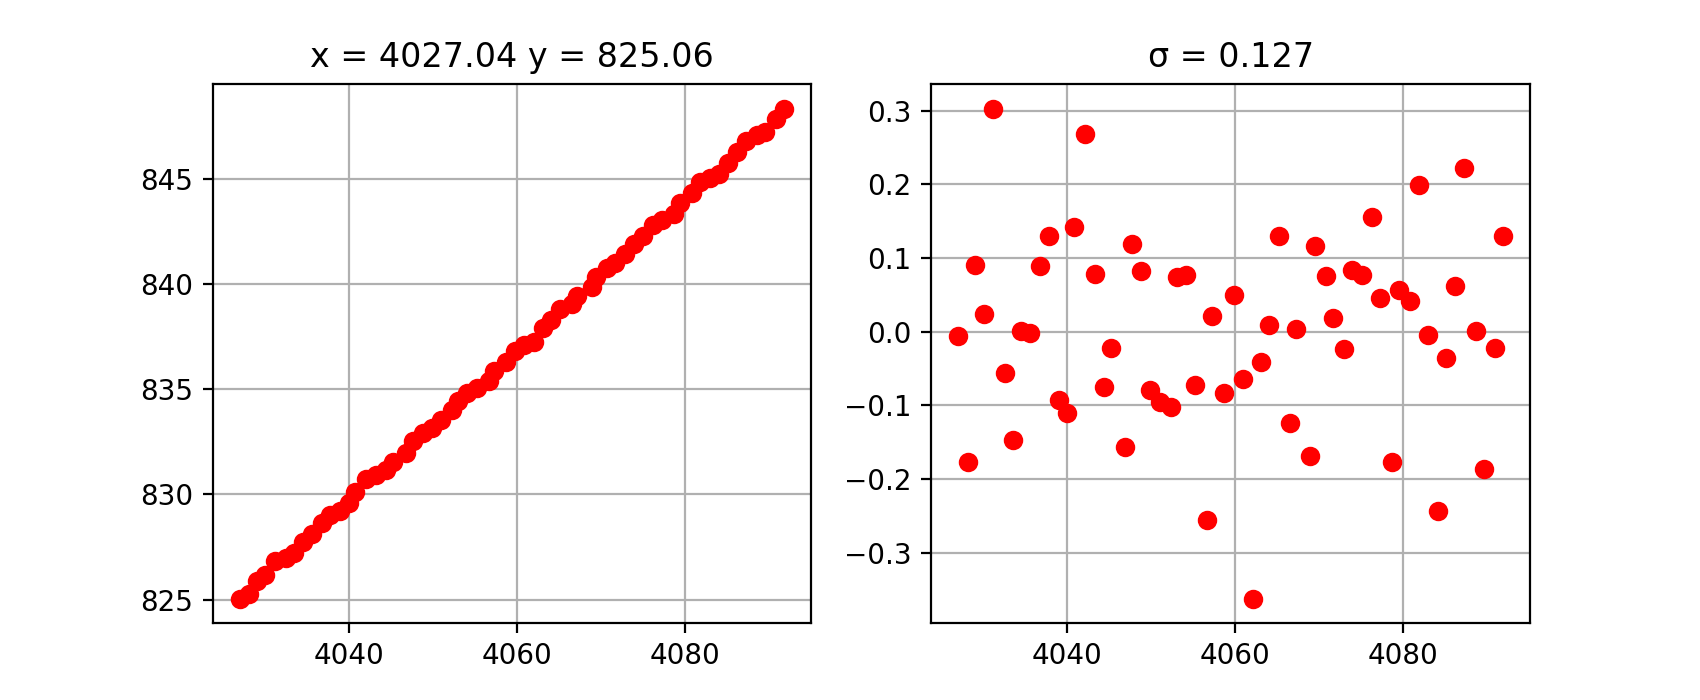

Cannot find star at  4200 1400 . Picking nearest.


<IPython.core.display.Javascript object>


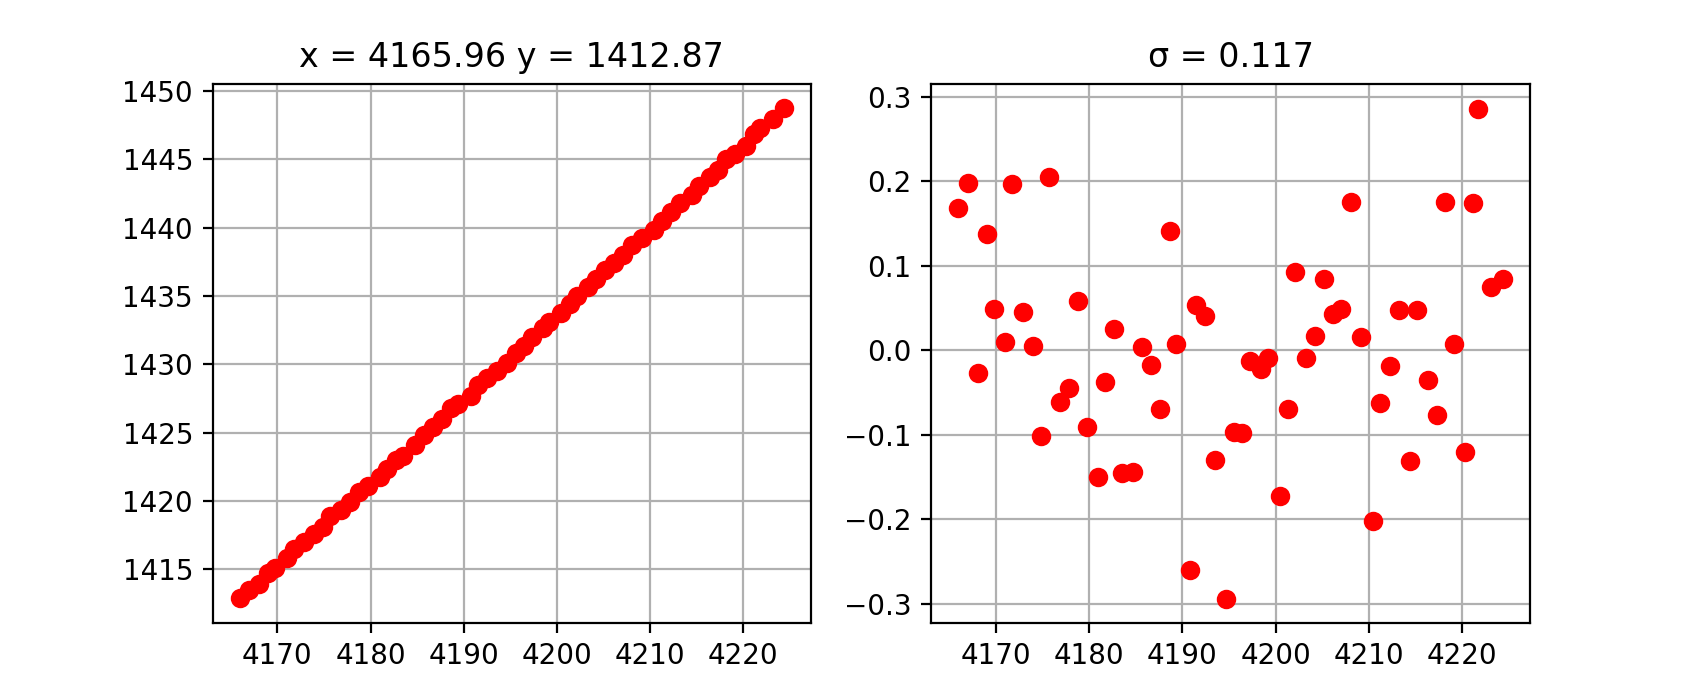

Cannot find star at  4200 2100 . Picking nearest.


<IPython.core.display.Javascript object>


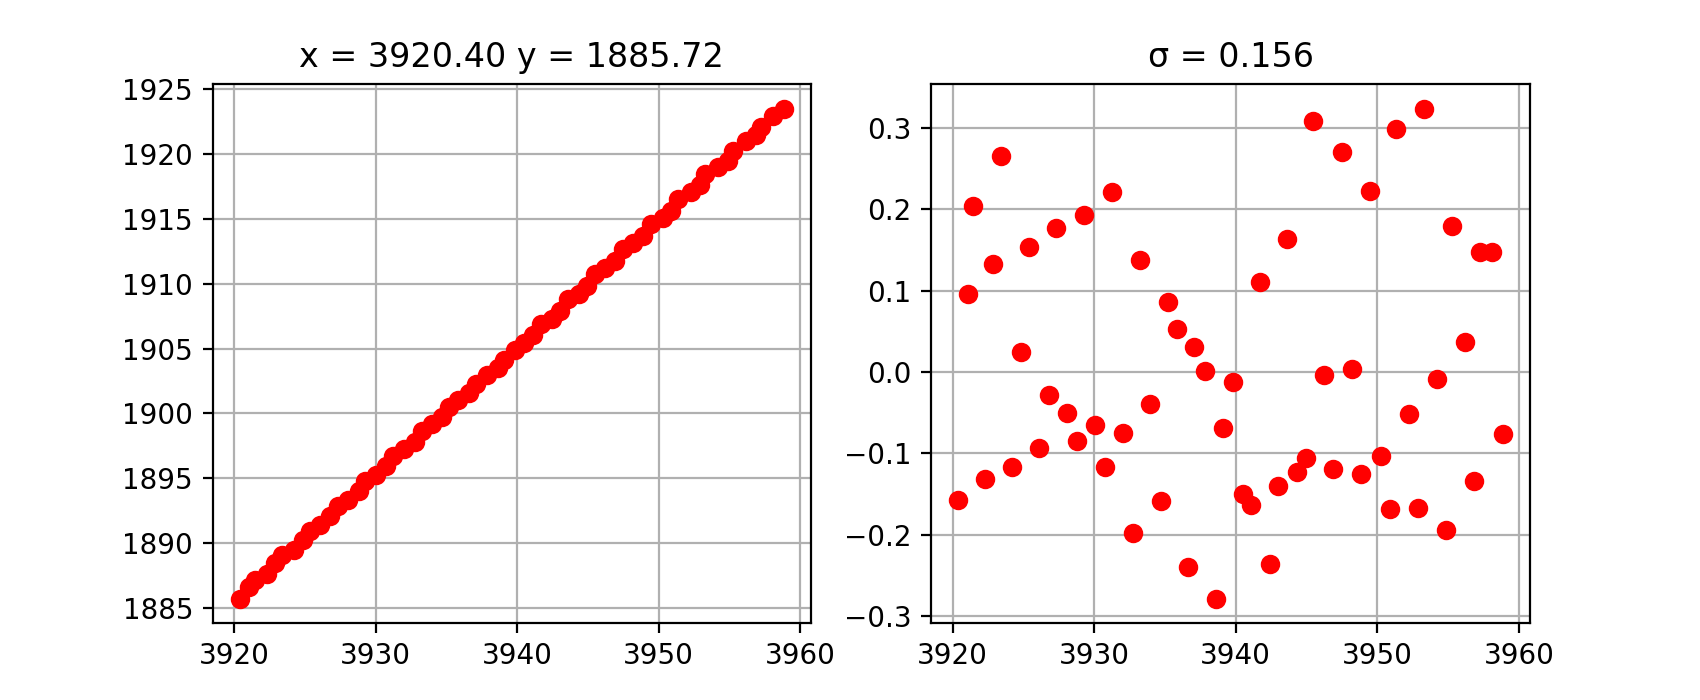

Cannot find star at  4200 2800 . Picking nearest.


<IPython.core.display.Javascript object>


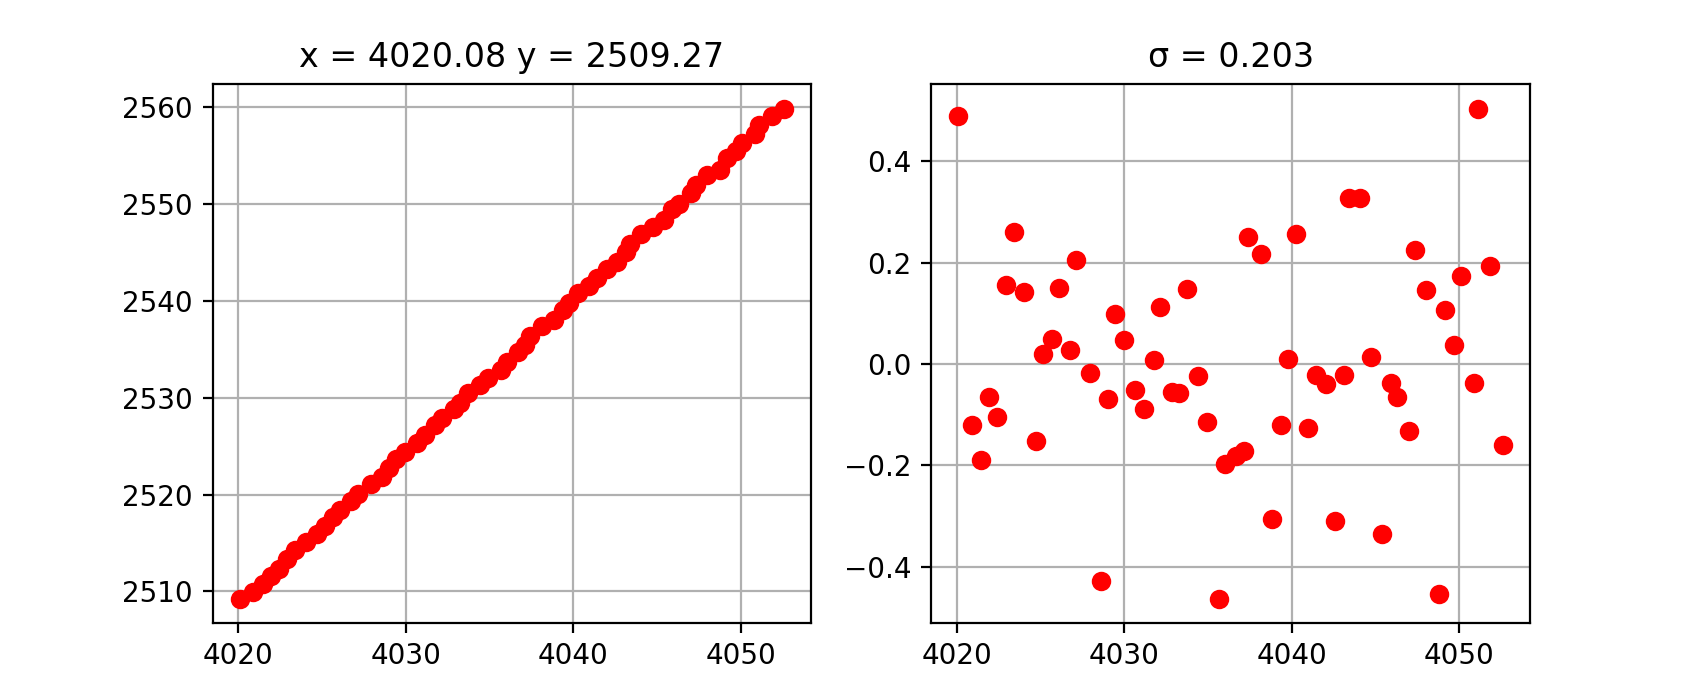

In [14]:
# step over evenly spaced positions in image, and pick
# nearest star for ploting.
step = 700
for x in range(step, nx, step):
    for y in range(step, ny, step):
        plot_residuals(x, y, table_list, nearest=True)